In [310]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ['have_cocoa_butter', 'have_not_cocoa_butter']

In [311]:
chocolate = pd.read_csv('chocolate.csv')

In [312]:
chocolate.head()

,serial,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN


## To find missing values in the dataset

In [313]:
chocolate.isnull().sum()

serial                                 0
ref                                    0
company                                0
company_location                       0
review_date                            0
country_of_bean_origin                 0
specific_bean_origin_or_bar_name       0
cocoa_percent                          0
rating                                 0
counts_of_ingredients                  0
beans                                  0
cocoa_butter                           0
vanilla                                0
lecithin                               0
salt                                   0
sugar                                  0
sweetener_without_sugar                0
first_taste                            0
second_taste                          77
third_taste                          620
fourth_taste                        1982
dtype: int64

In [314]:
chocolate.dtypes

serial                                int64
ref                                   int64
company                              object
company_location                     object
review_date                           int64
country_of_bean_origin               object
specific_bean_origin_or_bar_name     object
cocoa_percent                       float64
rating                              float64
counts_of_ingredients                 int64
beans                                object
cocoa_butter                         object
vanilla                              object
lecithin                             object
salt                                 object
sugar                                object
sweetener_without_sugar              object
first_taste                          object
second_taste                         object
third_taste                          object
fourth_taste                         object
dtype: object

## Filling missing values in categorical variables

In [315]:
chocolate_columns = pd.read_csv('chocolate.csv', usecols = ['second_taste', 'third_taste', 'fourth_taste'])

In [316]:
def impute_nan(chocolate_columns, variable):
    chocolate_columns[variable+' newvar']=np.where(chocolate_columns[variable].isnull(), "unknown", chocolate_columns[variable])

for feature in chocolate_columns:
    impute_nan(chocolate_columns, feature)
    
chocolate_columns.head()

,second_taste,third_taste,fourth_taste,second_taste newvar,third_taste newvar,fourth_taste newvar
0,blackberry,full body,NaN,blackberry,full body,unknown
1,vegetal,savory,NaN,vegetal,savory,unknown
2,fatty,bready,NaN,fatty,bready,unknown
3,melon,roasty,NaN,melon,roasty,unknown
4,nutty,NaN,NaN,nutty,unknown,unknown


In [317]:
chocolate['second_taste']= chocolate_columns['second_taste newvar']
chocolate['third_taste']= chocolate_columns['third_taste newvar']
chocolate['fourth_taste']= chocolate_columns['fourth_taste newvar']
chocolate.head()

,serial,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,unknown
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,unknown
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,unknown
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,unknown
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,unknown,unknown


In [318]:
chocolate.drop(['serial', 'beans'], inplace=True, axis=1)

In [319]:
chocolate.dtypes

ref                                   int64
company                              object
company_location                     object
review_date                           int64
country_of_bean_origin               object
specific_bean_origin_or_bar_name     object
cocoa_percent                       float64
rating                              float64
counts_of_ingredients                 int64
cocoa_butter                         object
vanilla                              object
lecithin                             object
salt                                 object
sugar                                object
sweetener_without_sugar              object
first_taste                          object
second_taste                         object
third_taste                          object
fourth_taste                         object
dtype: object

In [320]:
chocolate = chocolate[['ref', 'company', 'company_location', 'review_date', 'country_of_bean_origin', 'specific_bean_origin_or_bar_name', 'cocoa_percent', 'rating', 'counts_of_ingredients', 'lecithin', 'vanilla', 'salt', 'sugar', 'sweetener_without_sugar', 'first_taste', 'second_taste', 'third_taste', 'fourth_taste', 'cocoa_butter']]
chocolate.head()

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,lecithin,vanilla,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,cocoa_butter
0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_not_lecithin,have_not_vanila,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,unknown,have_cocoa_butter
1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,have_not_lecithin,have_not_vanila,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,unknown,have_cocoa_butter
2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,have_not_lecithin,have_not_vanila,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,unknown,have_cocoa_butter
3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,have_lecithin,have_not_vanila,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,unknown,have_cocoa_butter
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,have_lecithin,have_not_vanila,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,unknown,unknown,have_cocoa_butter


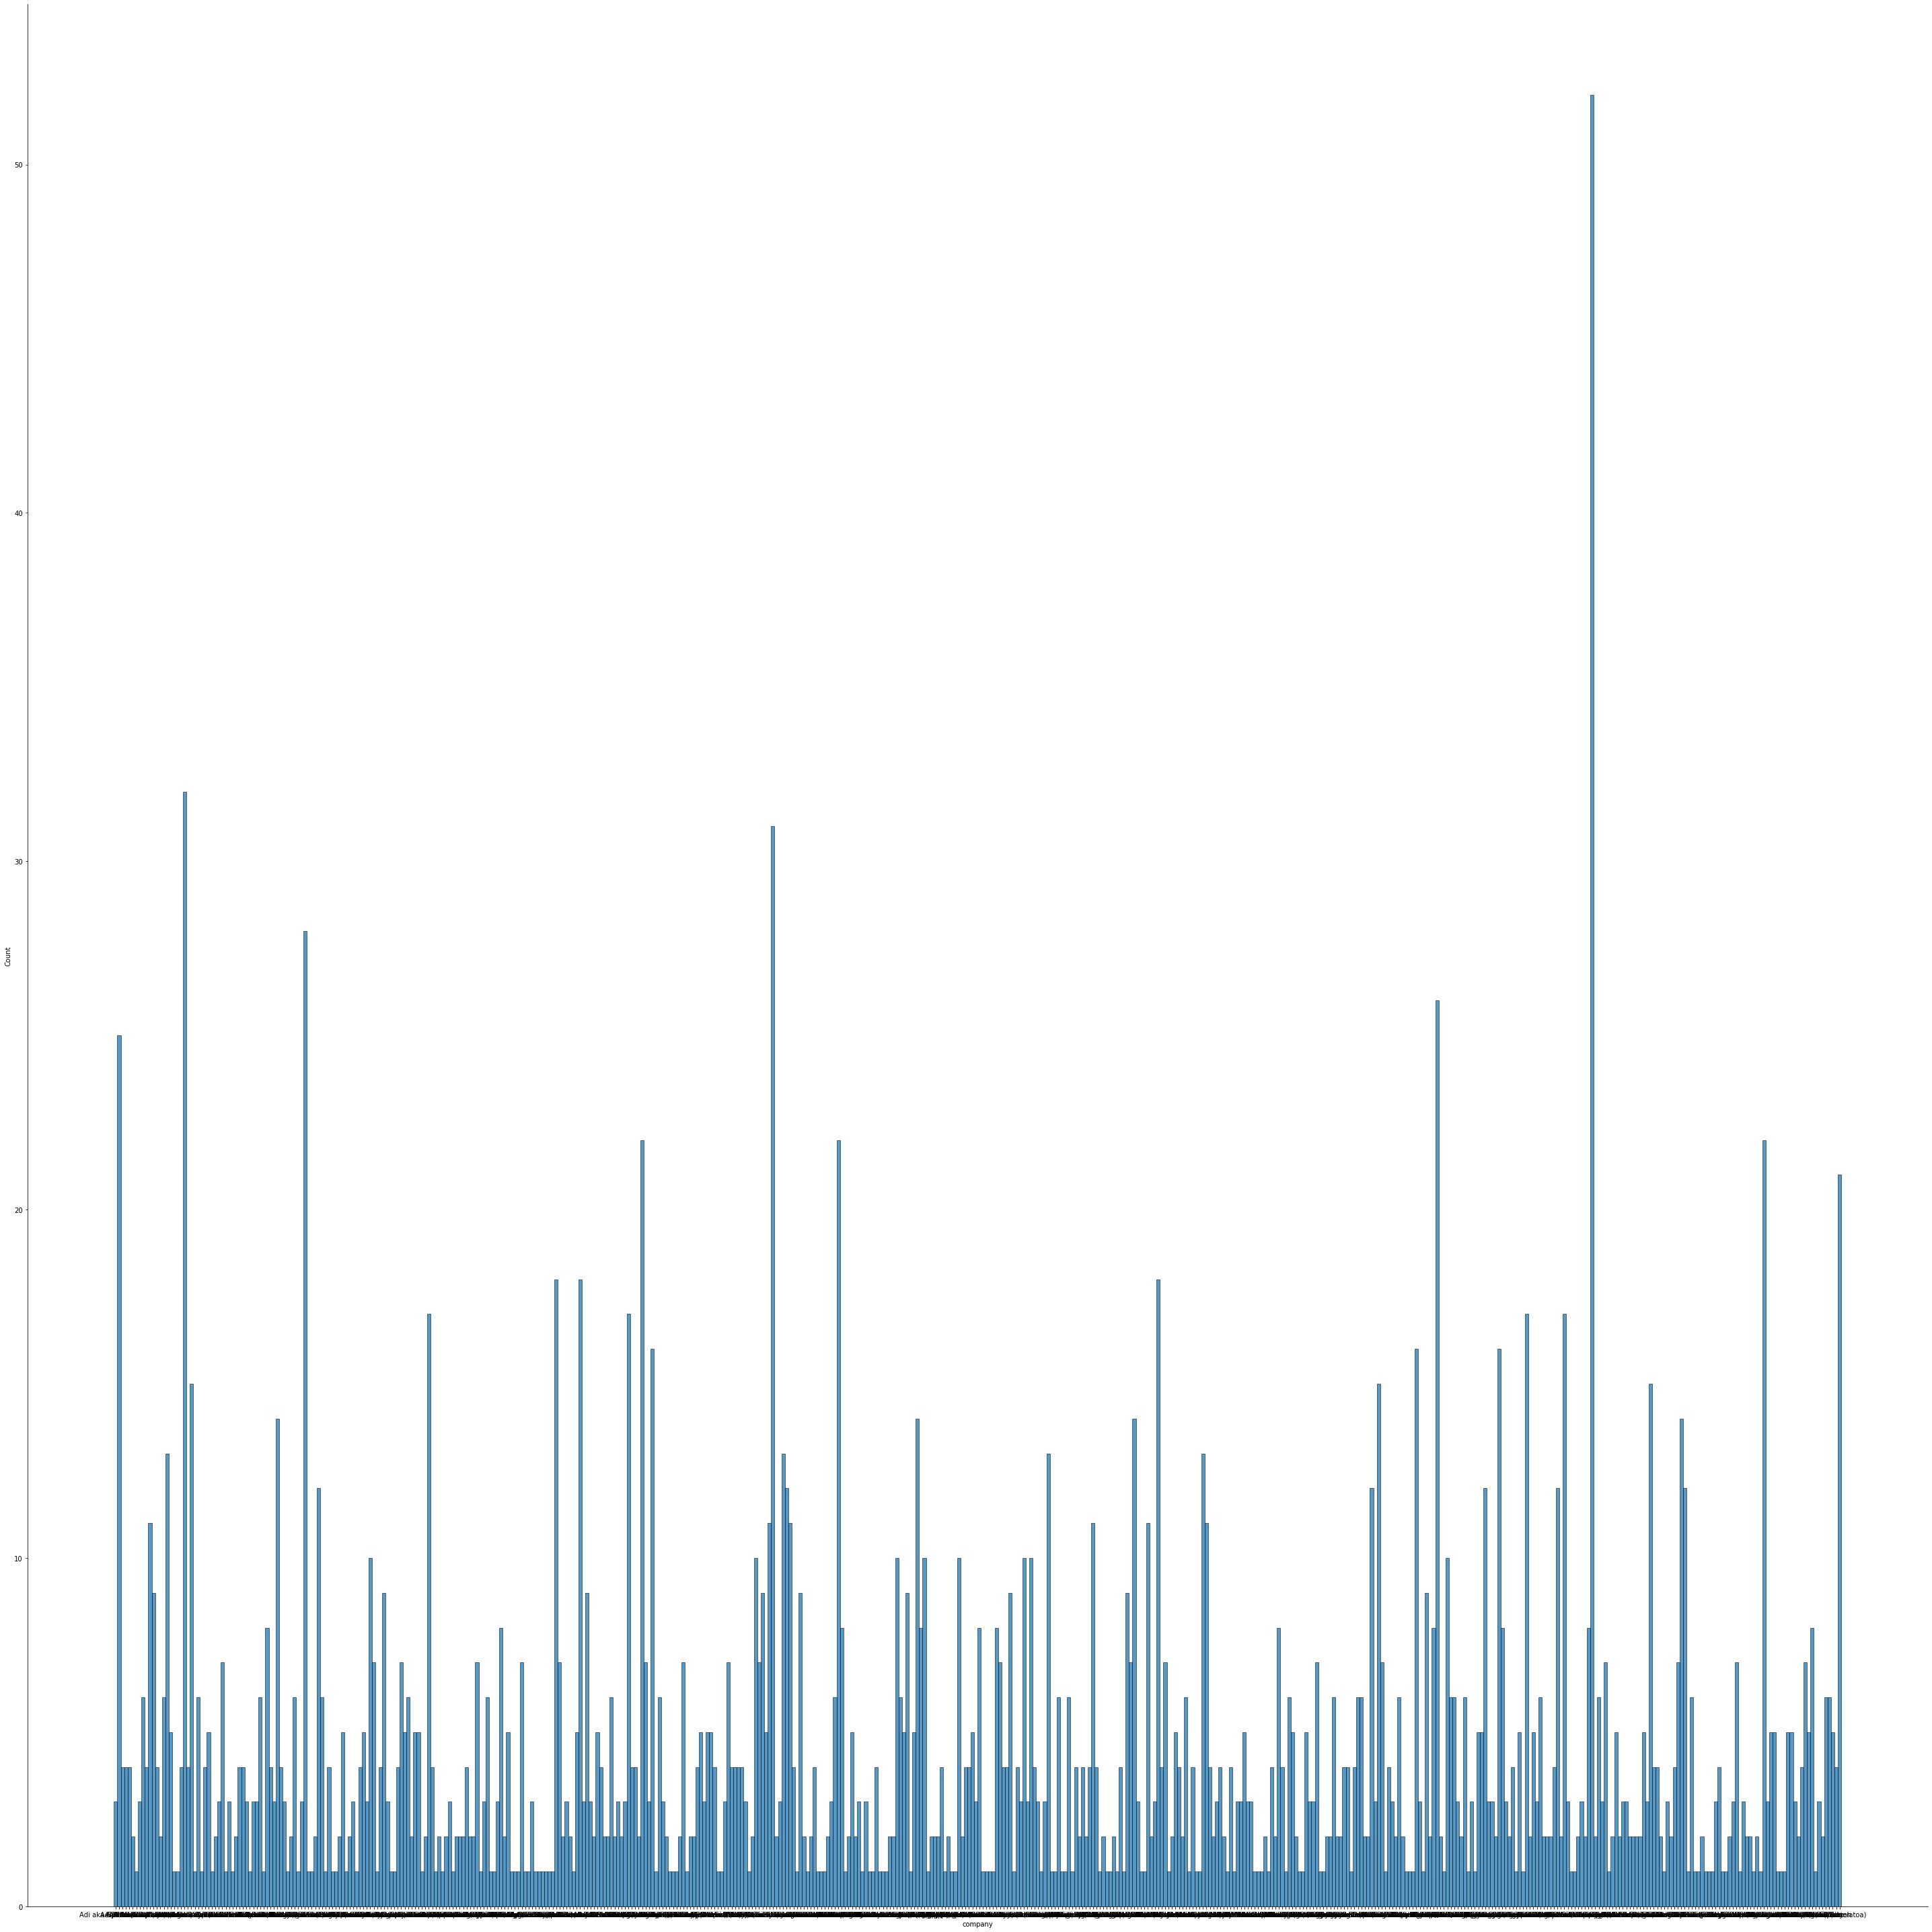

In [321]:
sns.displot(chocolate['company'], height = 40)

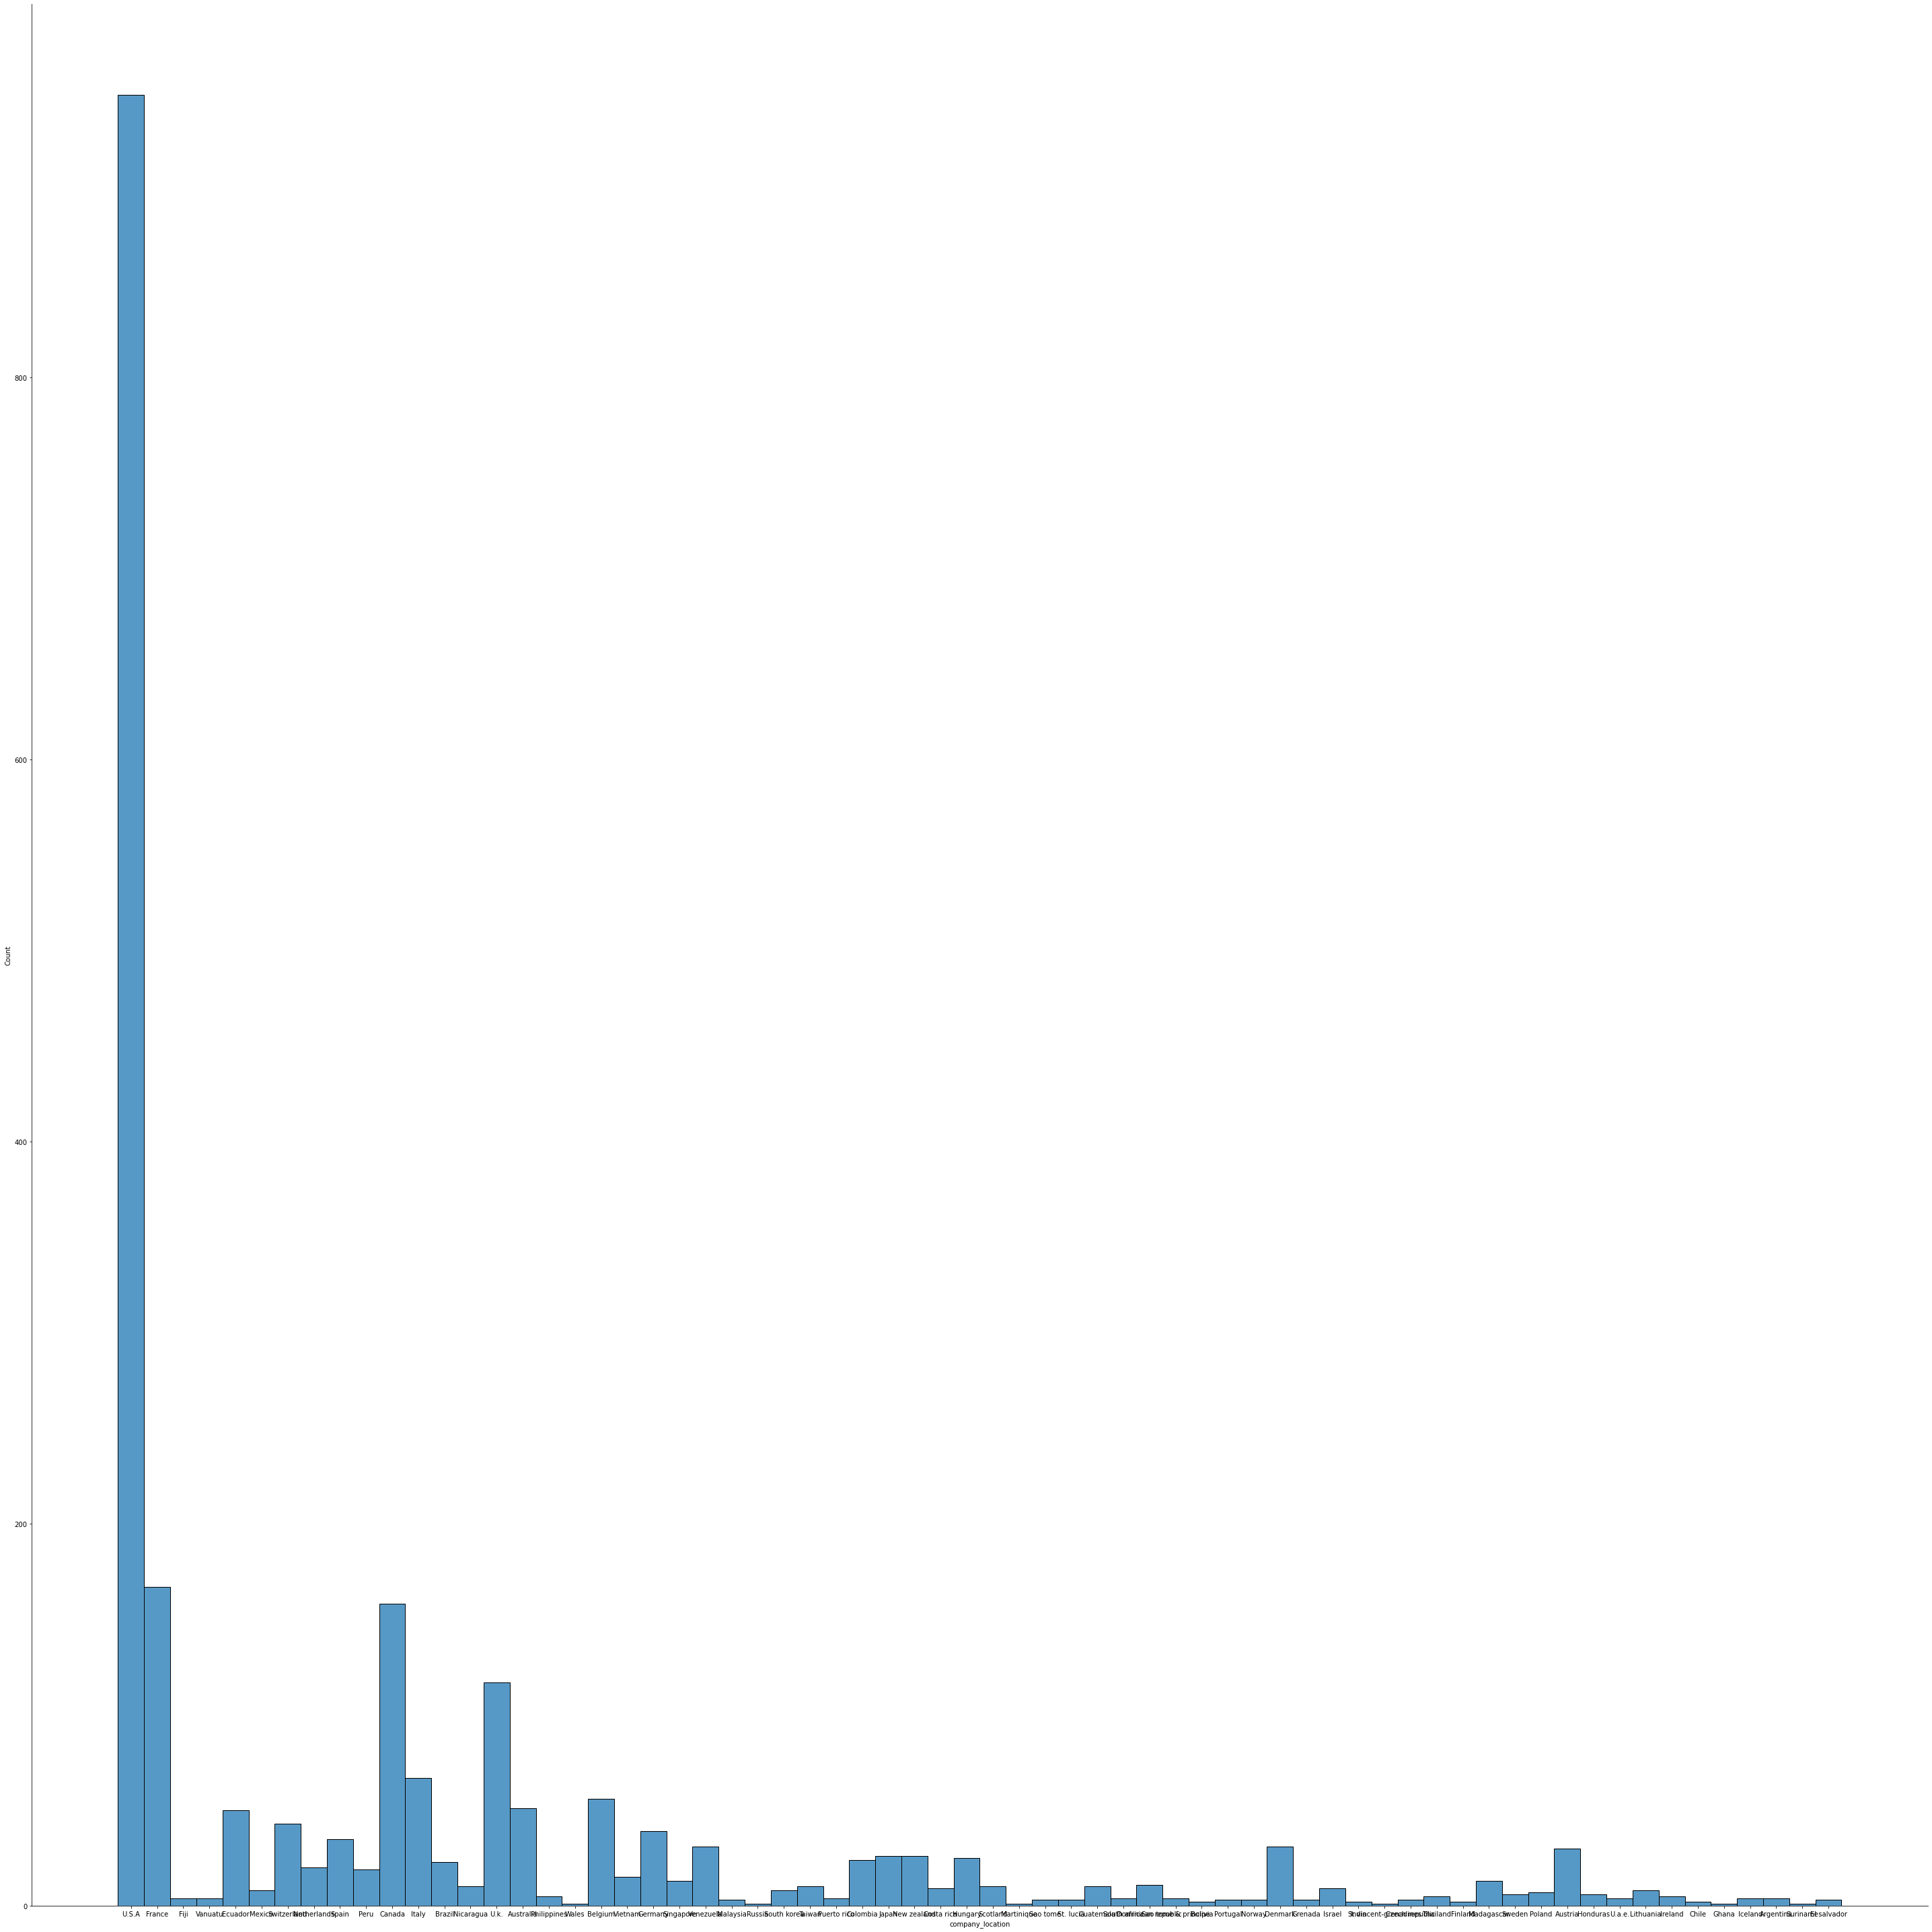

In [322]:
sns.displot(chocolate['company_location'], height=40)

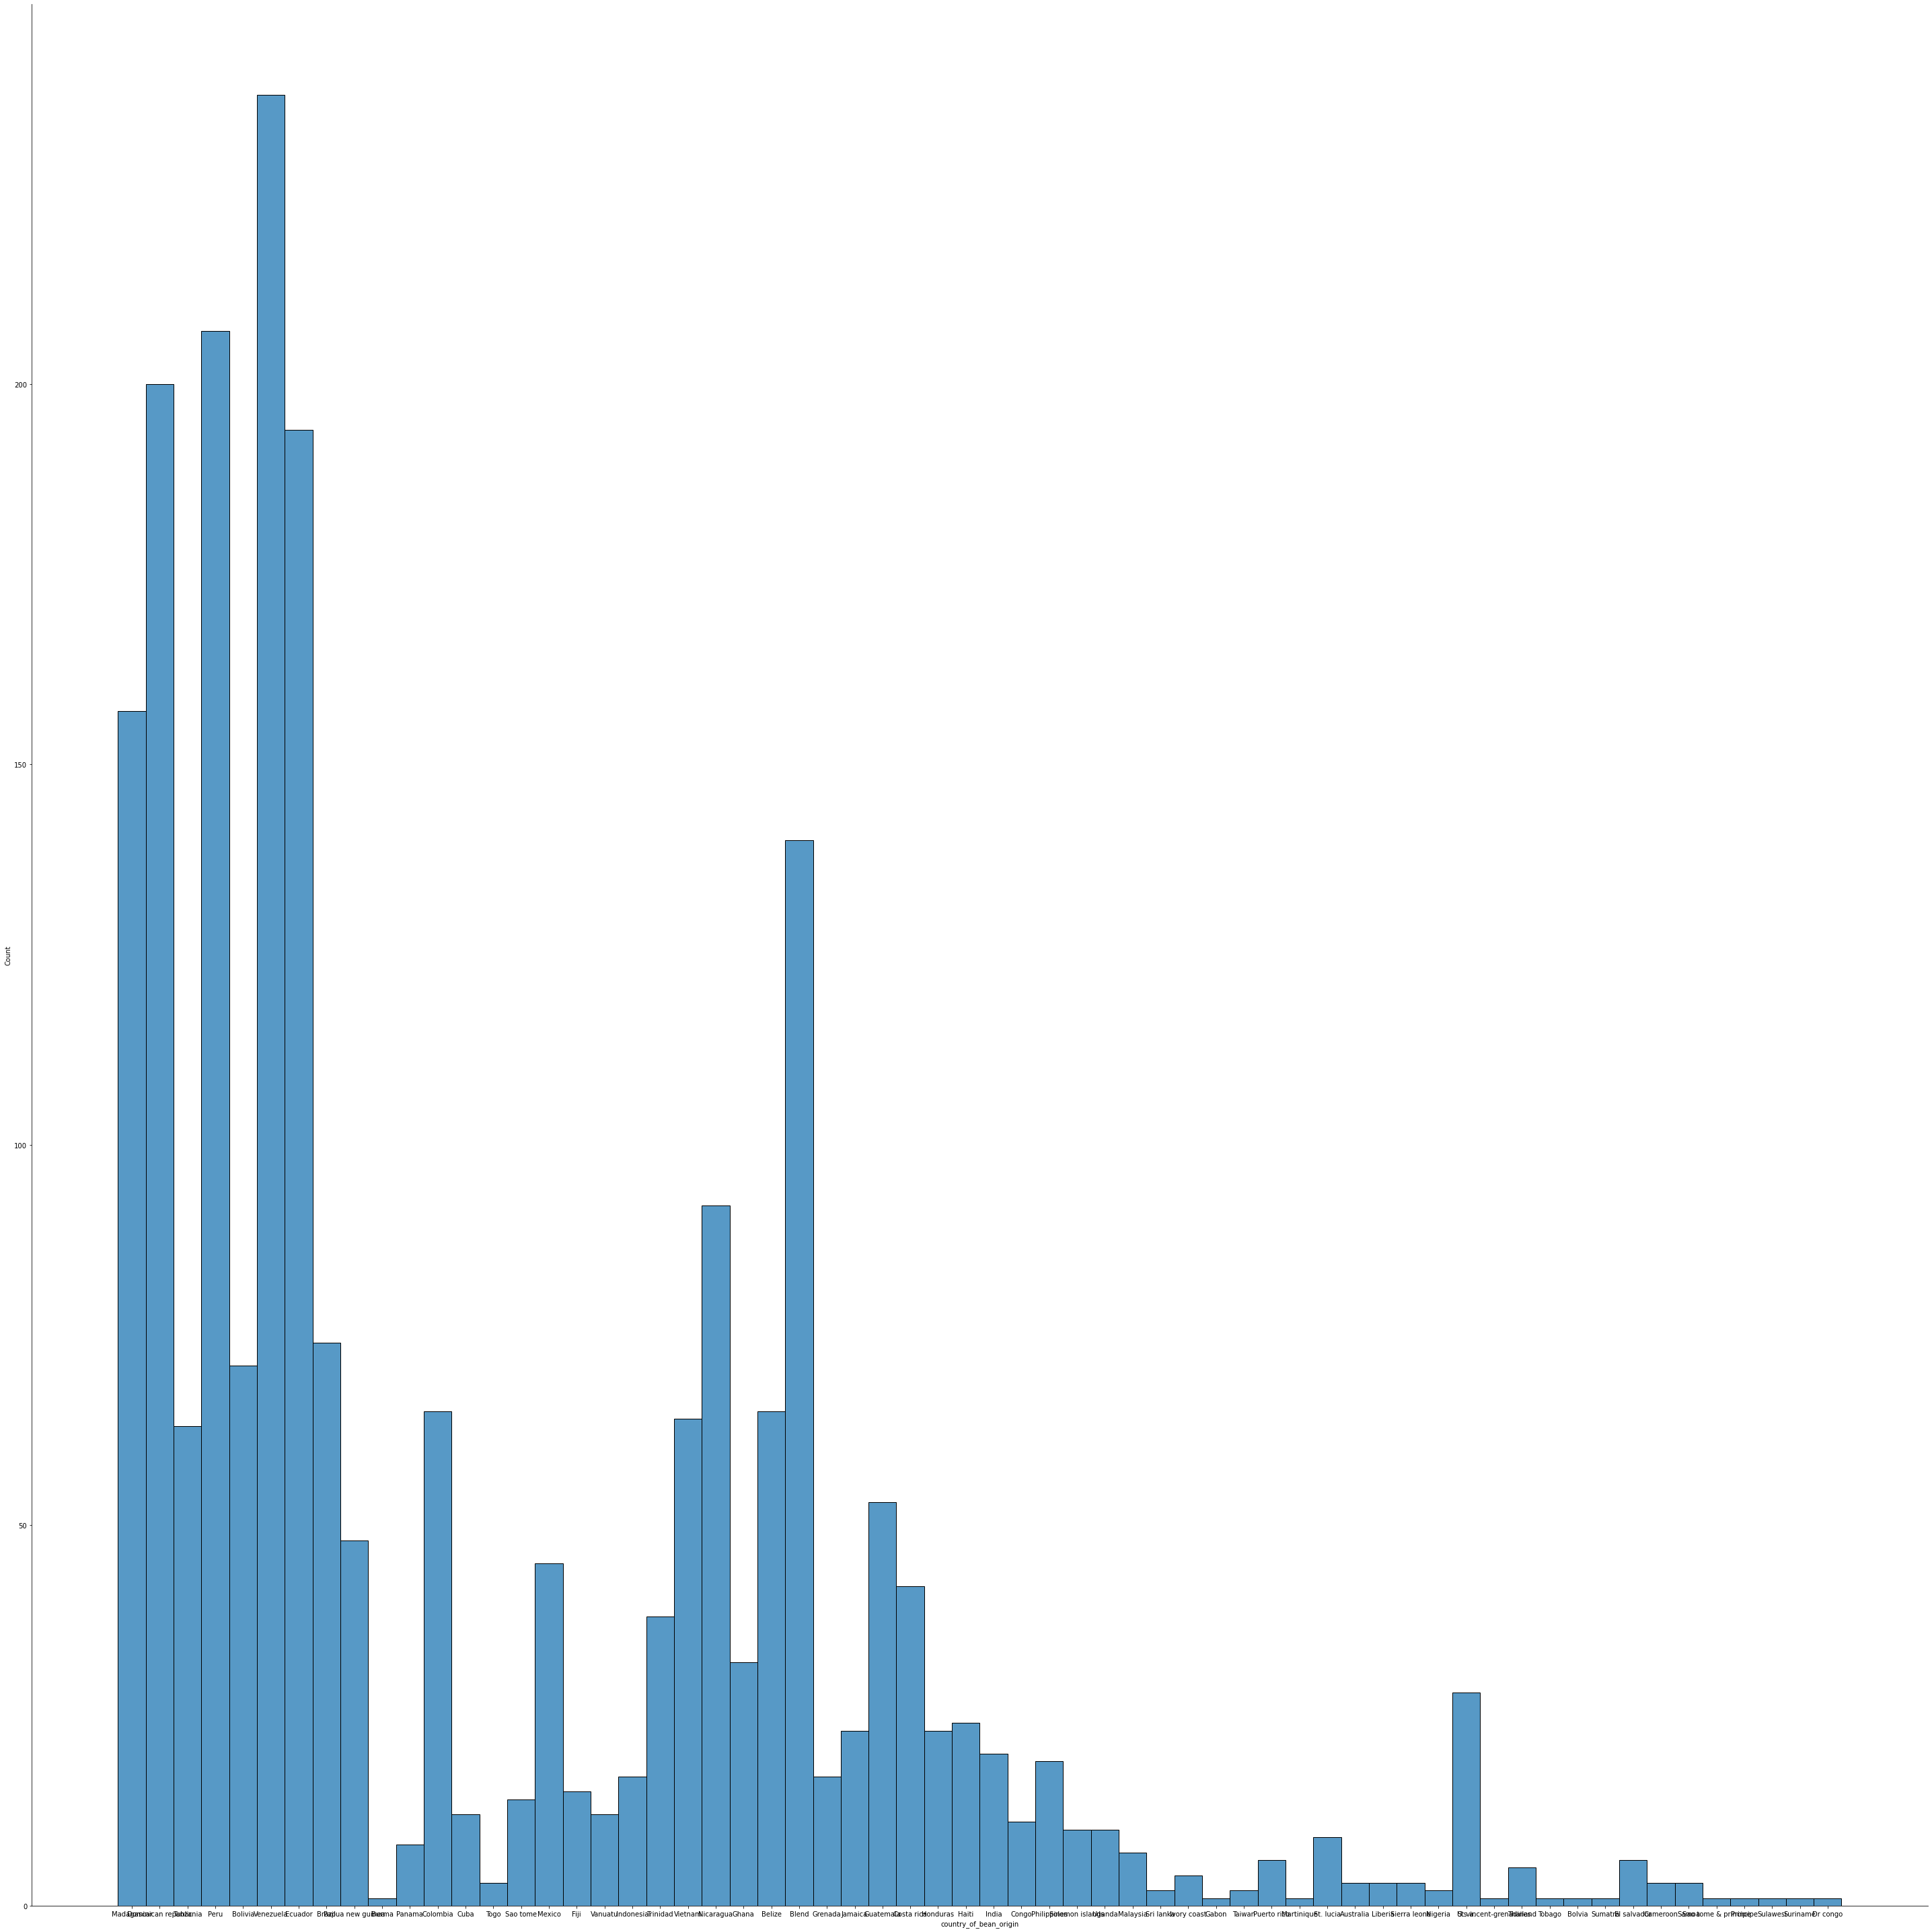

In [323]:
sns.displot(chocolate['country_of_bean_origin'], height = 40)

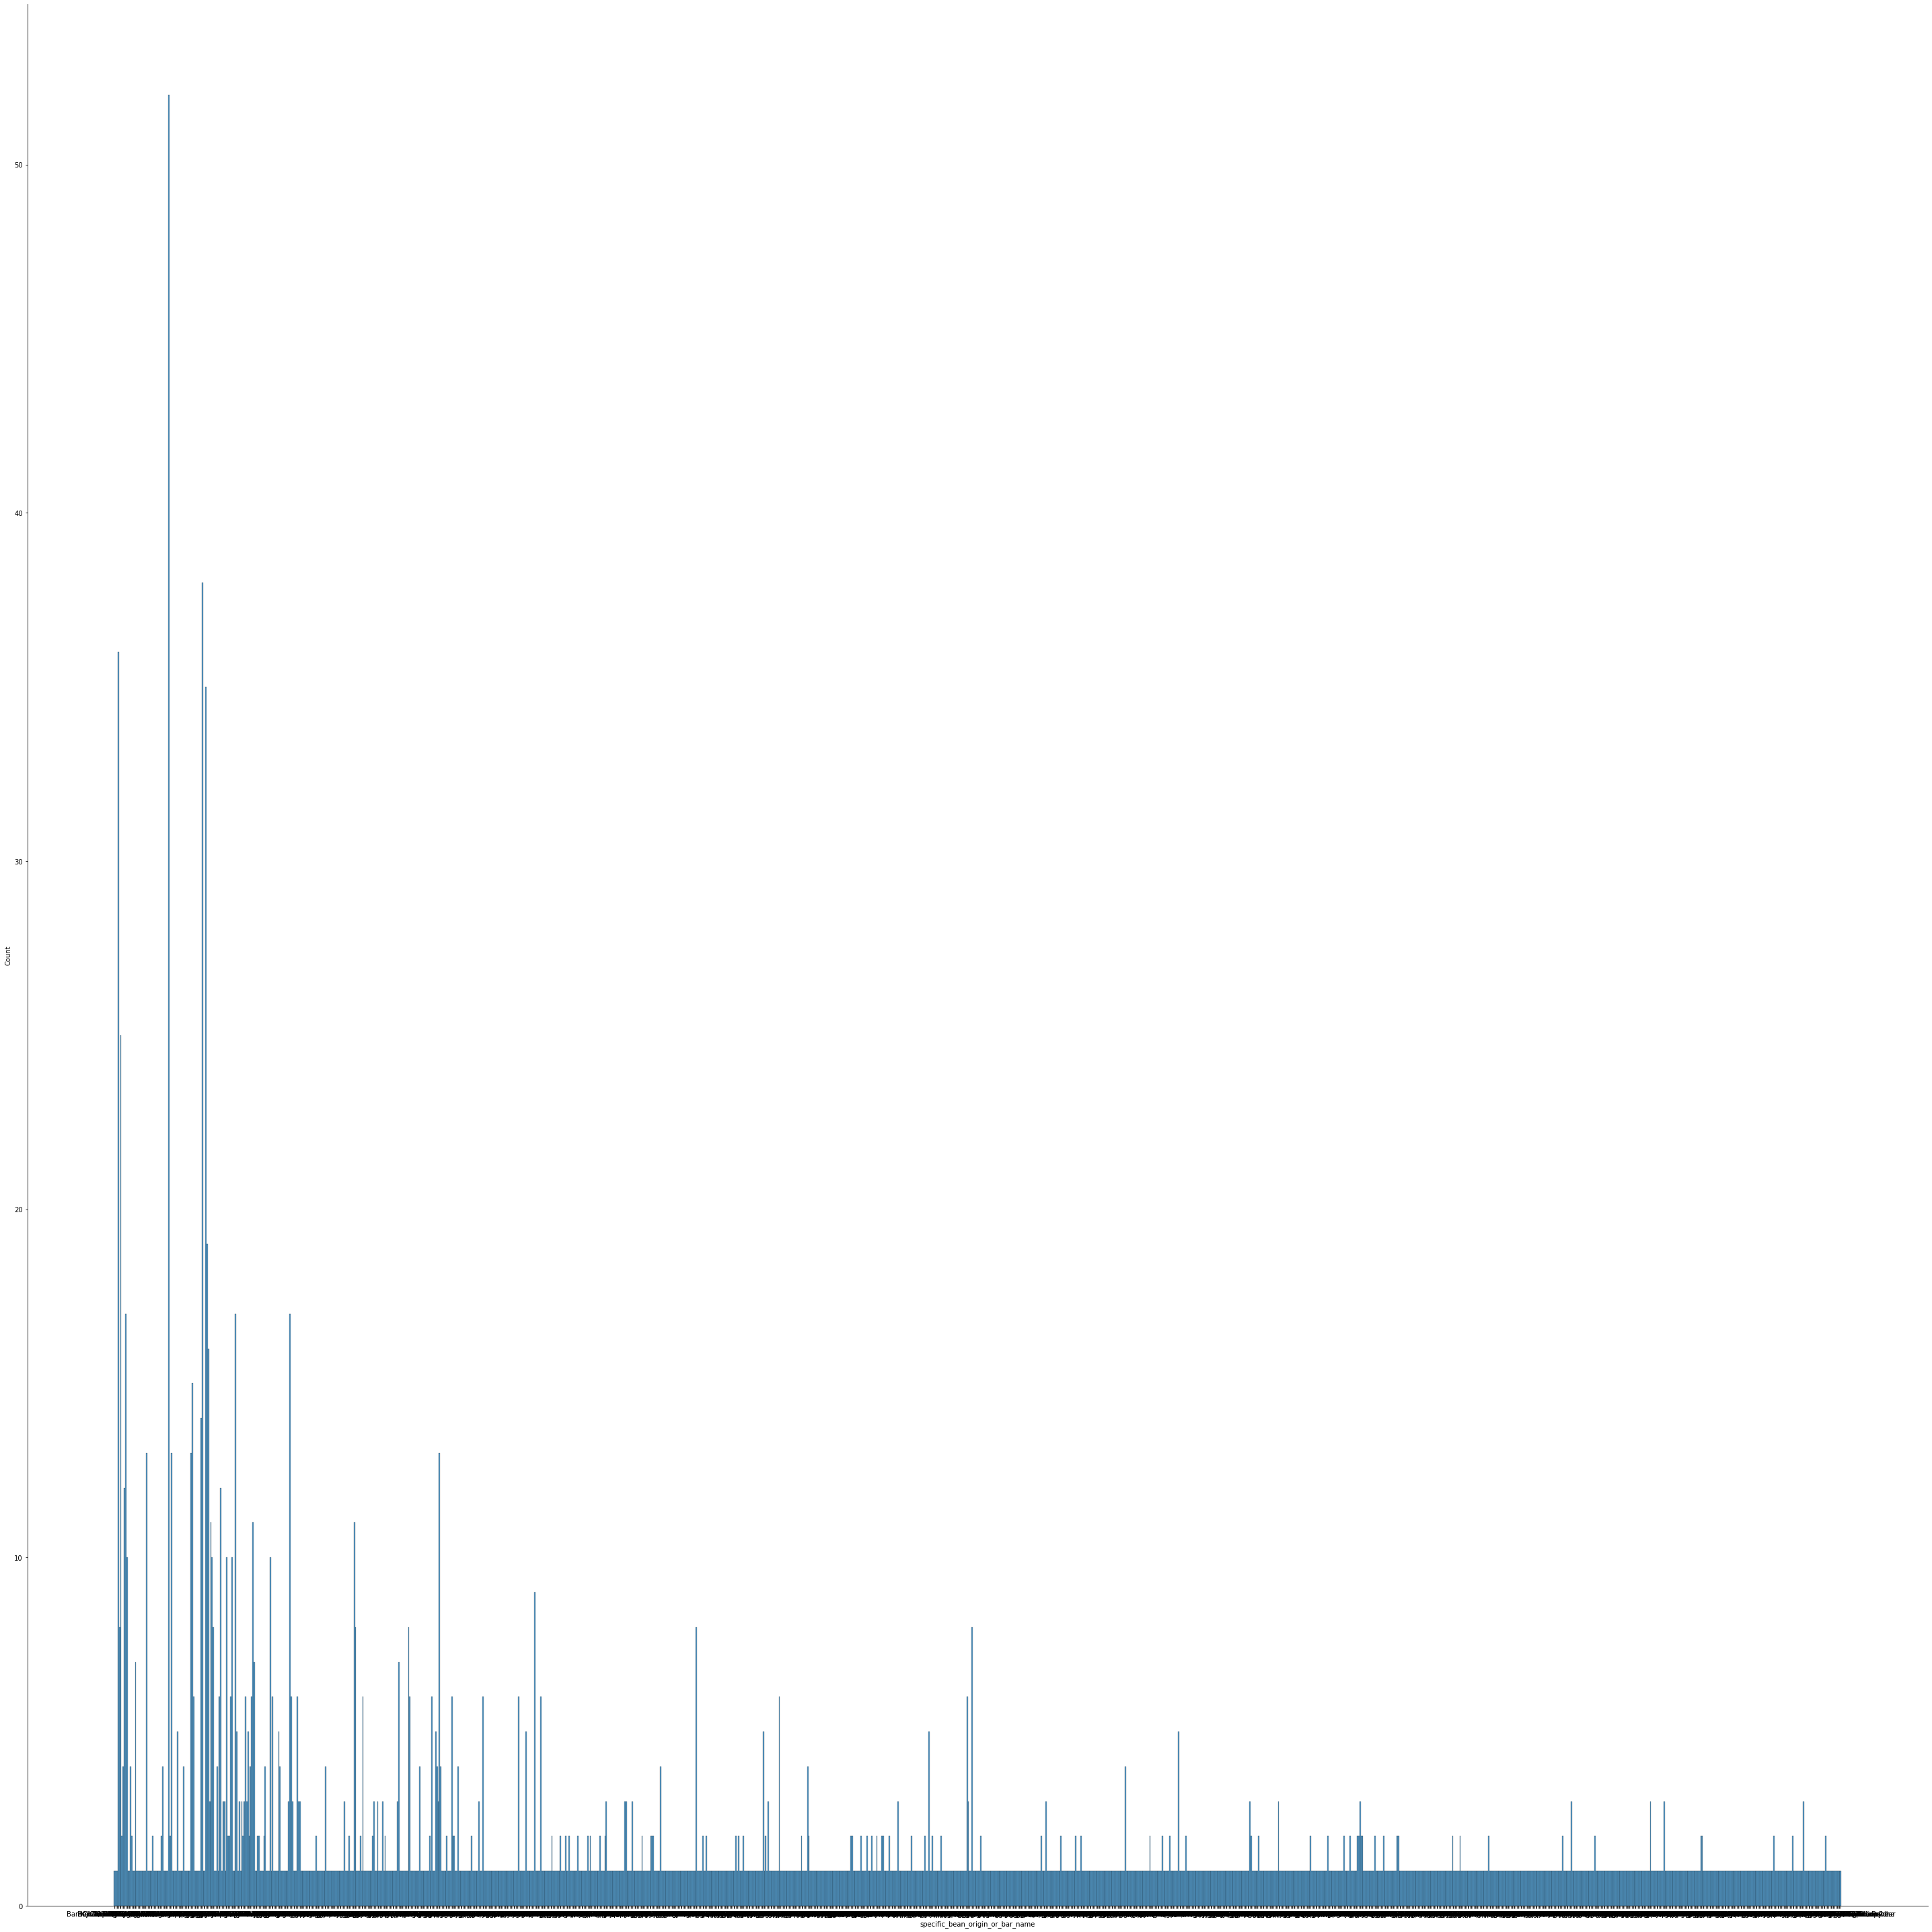

In [324]:
sns.displot(chocolate['specific_bean_origin_or_bar_name'], height = 40)

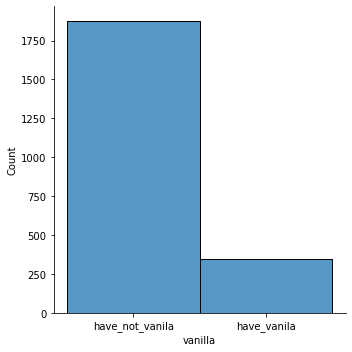

In [325]:
sns.displot(chocolate['vanilla'])

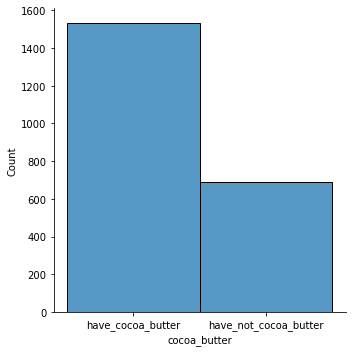

In [326]:
sns.displot(chocolate['cocoa_butter'])

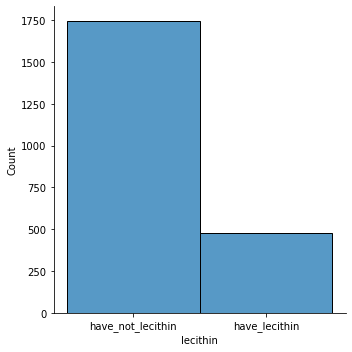

In [327]:
sns.displot(chocolate['lecithin'])

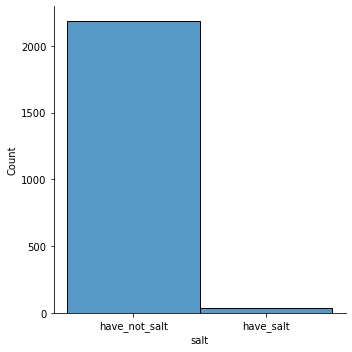

In [328]:
sns.displot(chocolate['salt'])

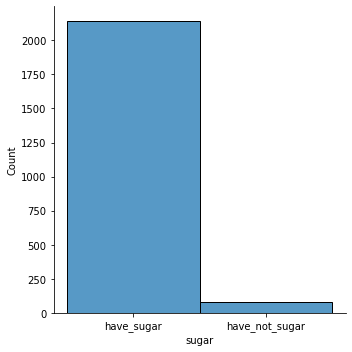

In [329]:
sns.displot(chocolate['sugar'])

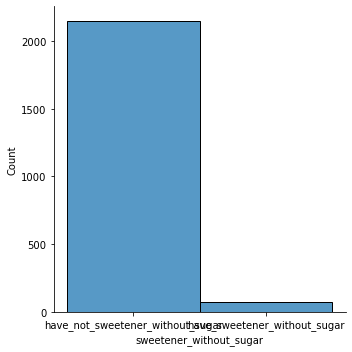

In [330]:
sns.displot(chocolate['sweetener_without_sugar'])

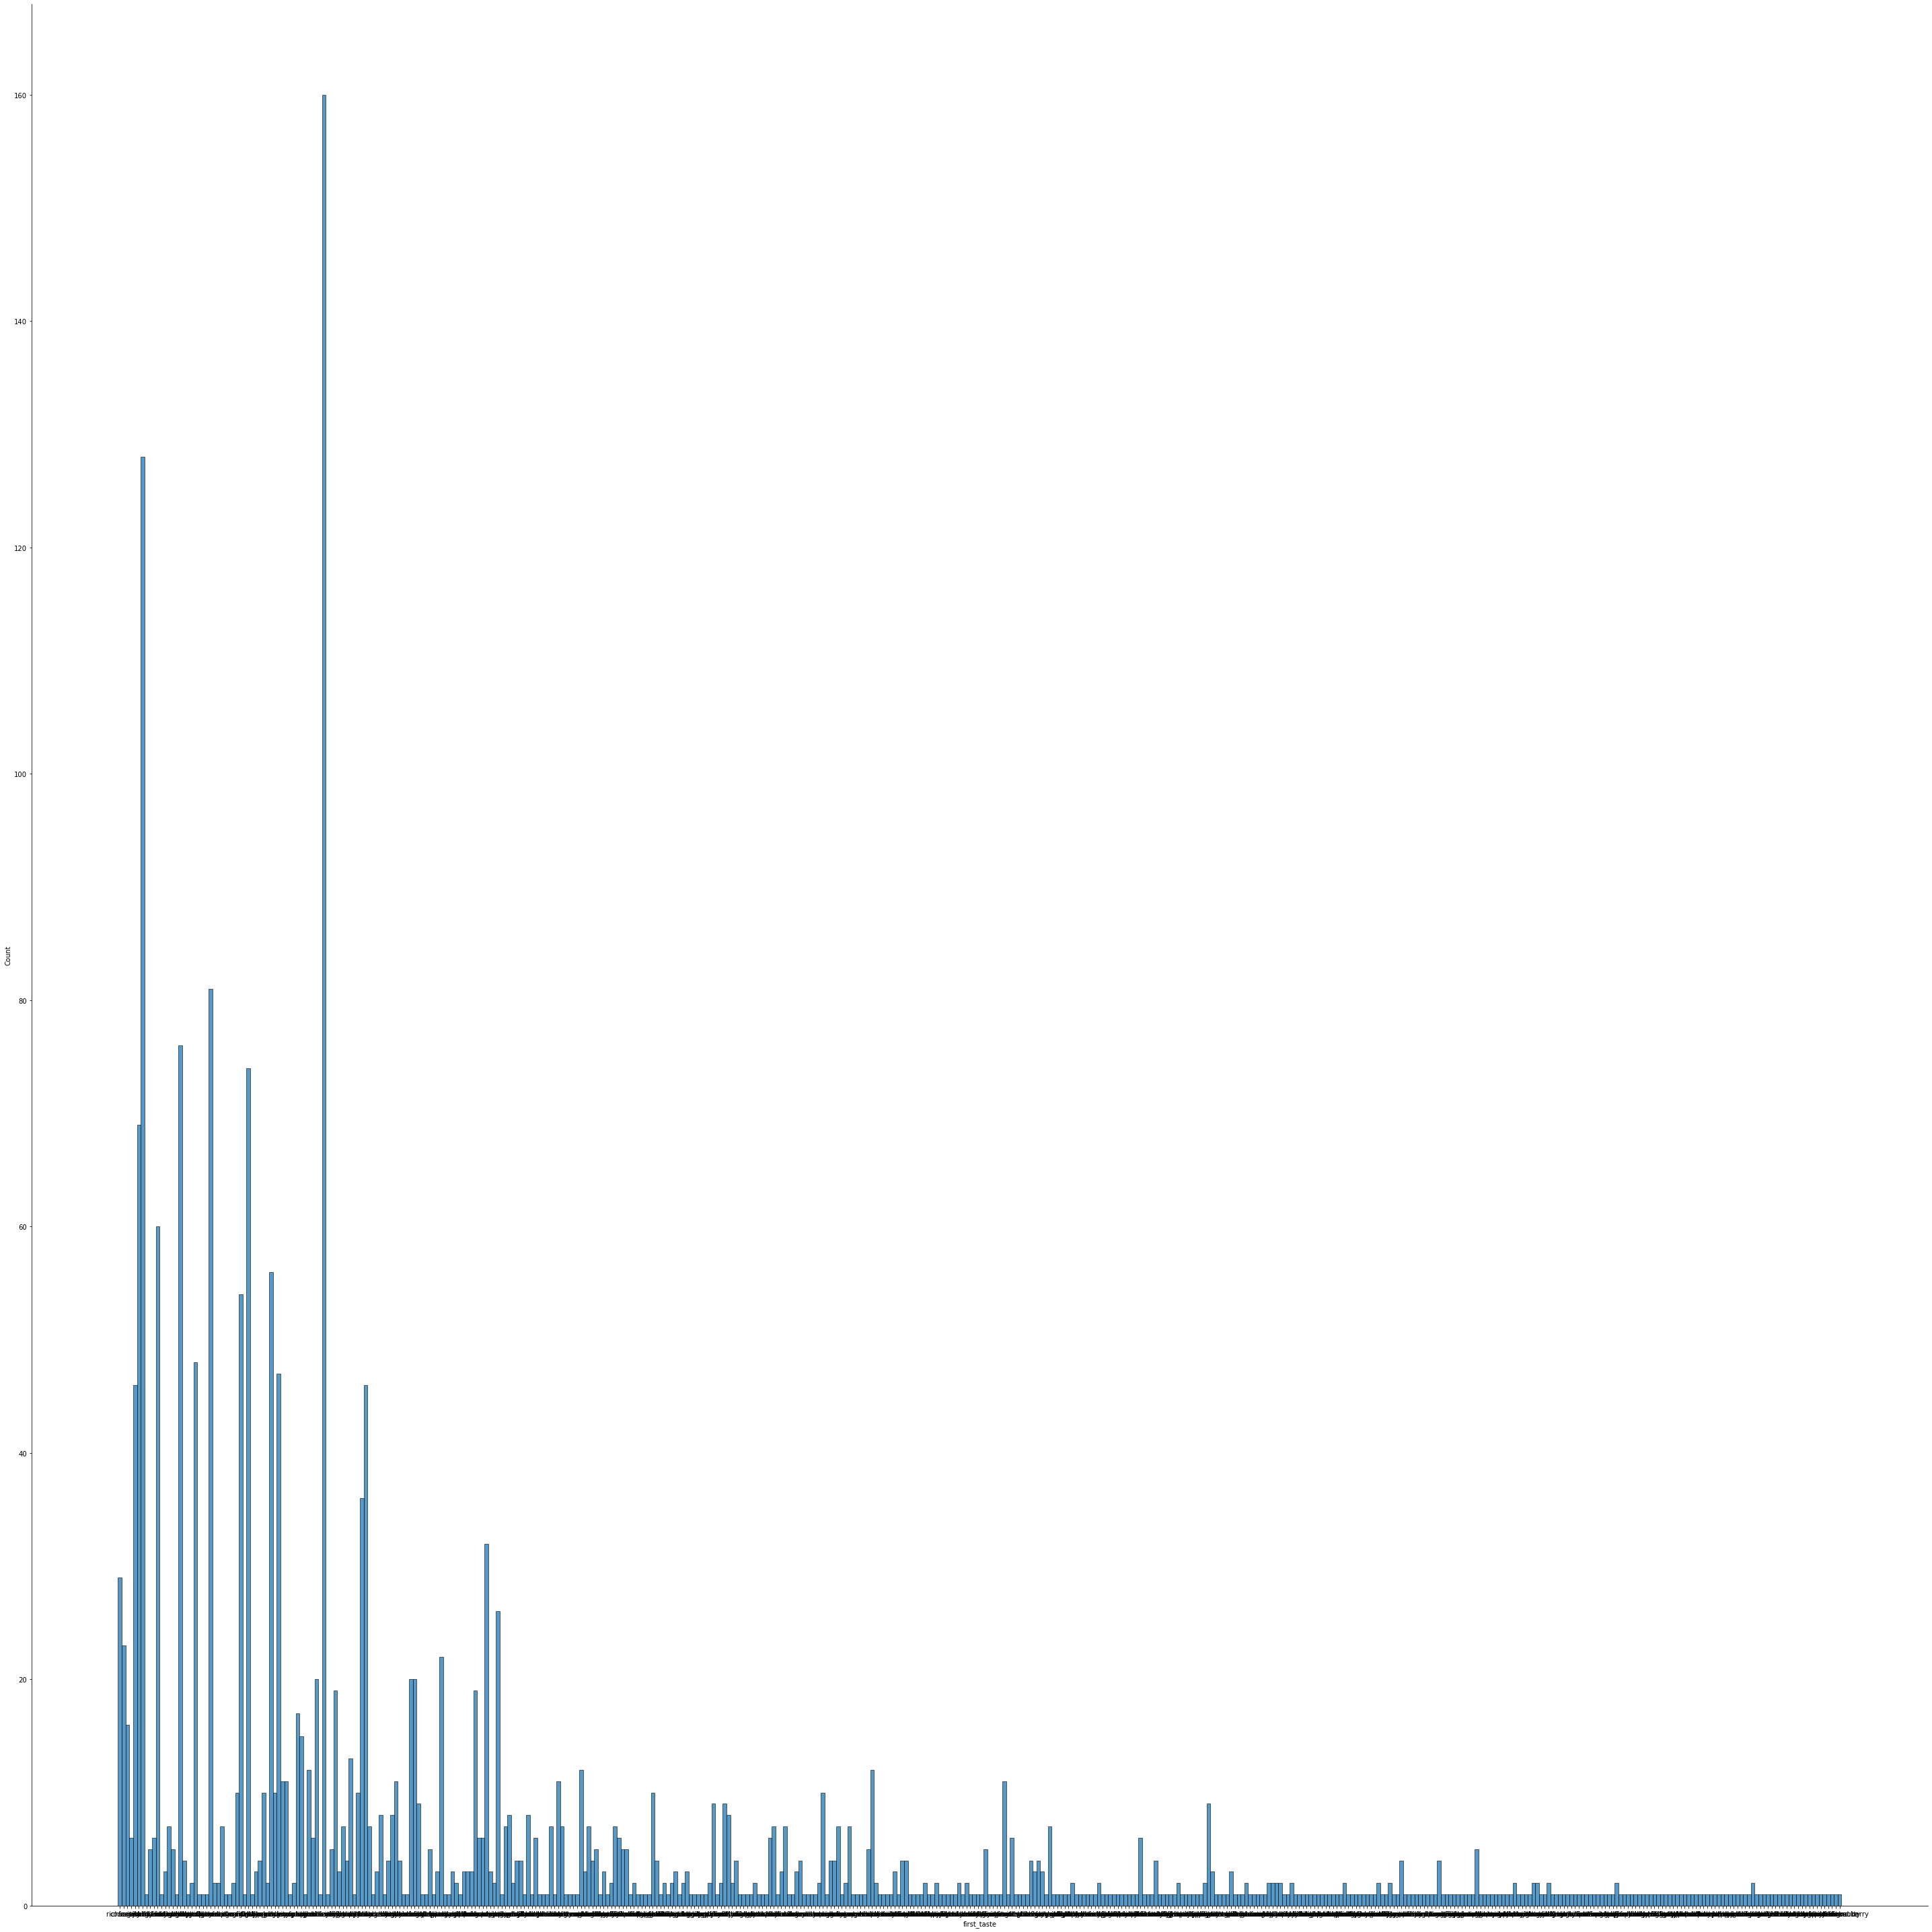

In [331]:
sns.displot(chocolate['first_taste'], height = 40)

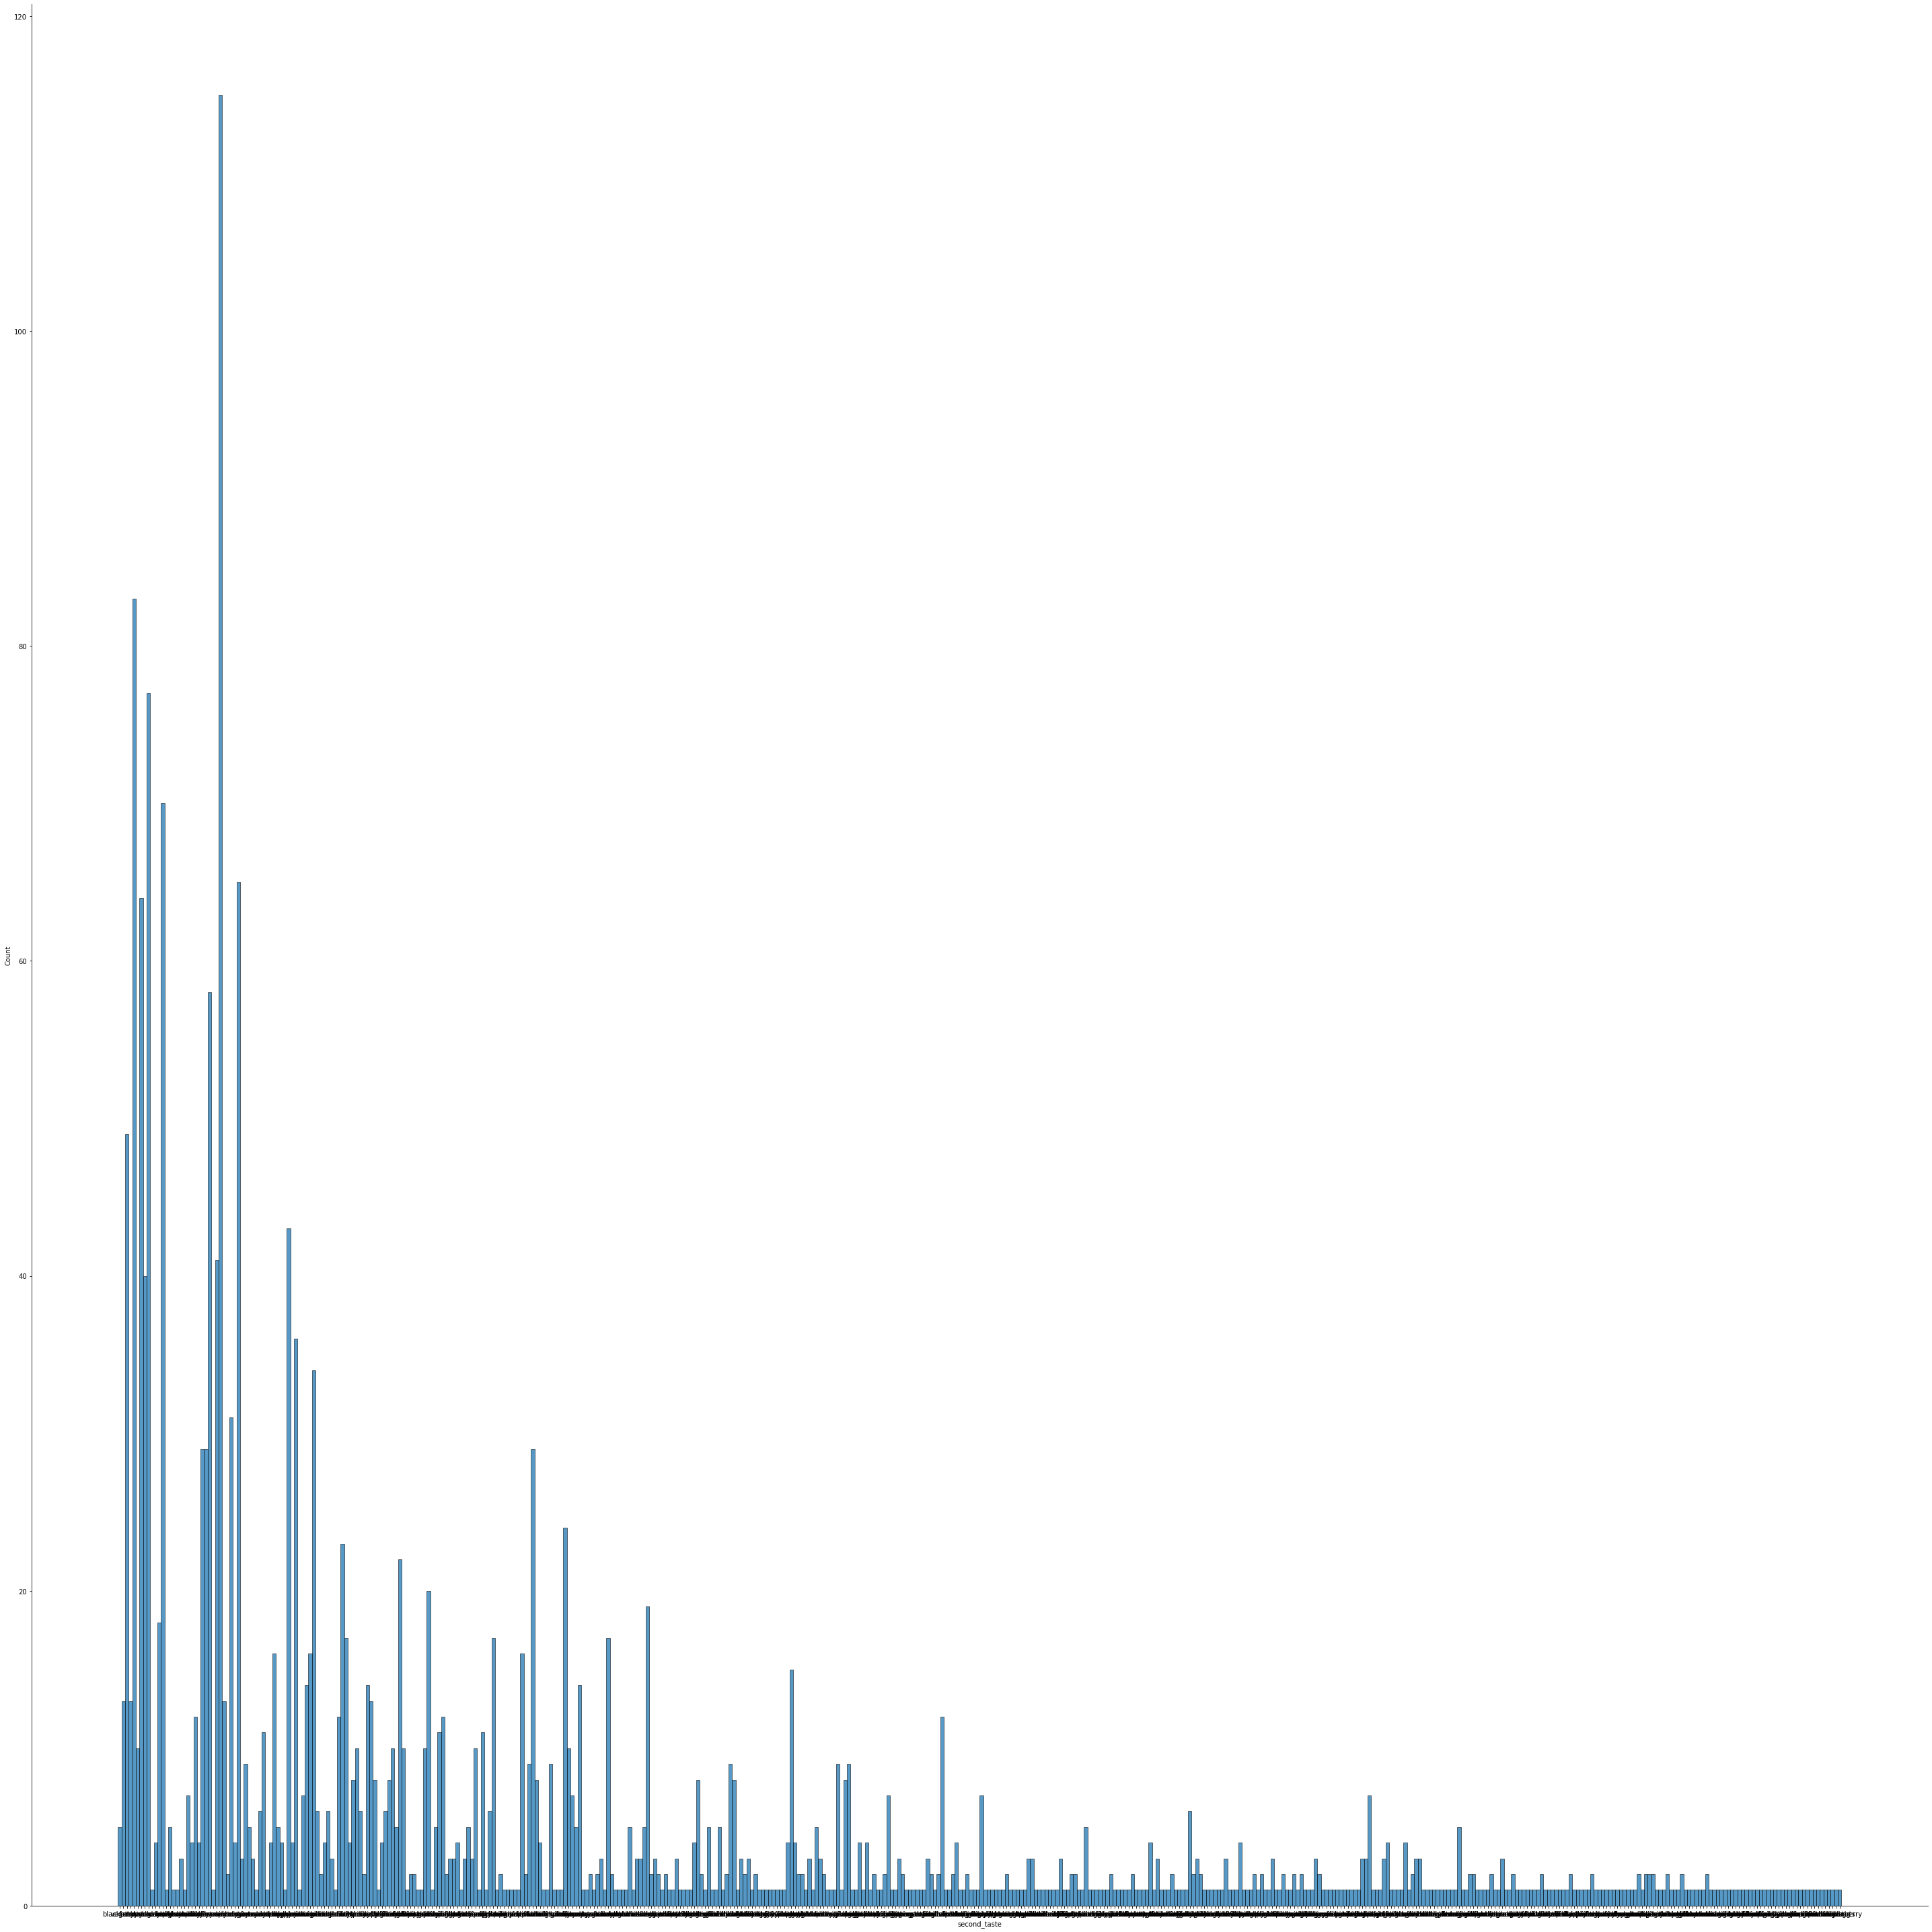

In [332]:
sns.displot(chocolate['second_taste'], height = 40)

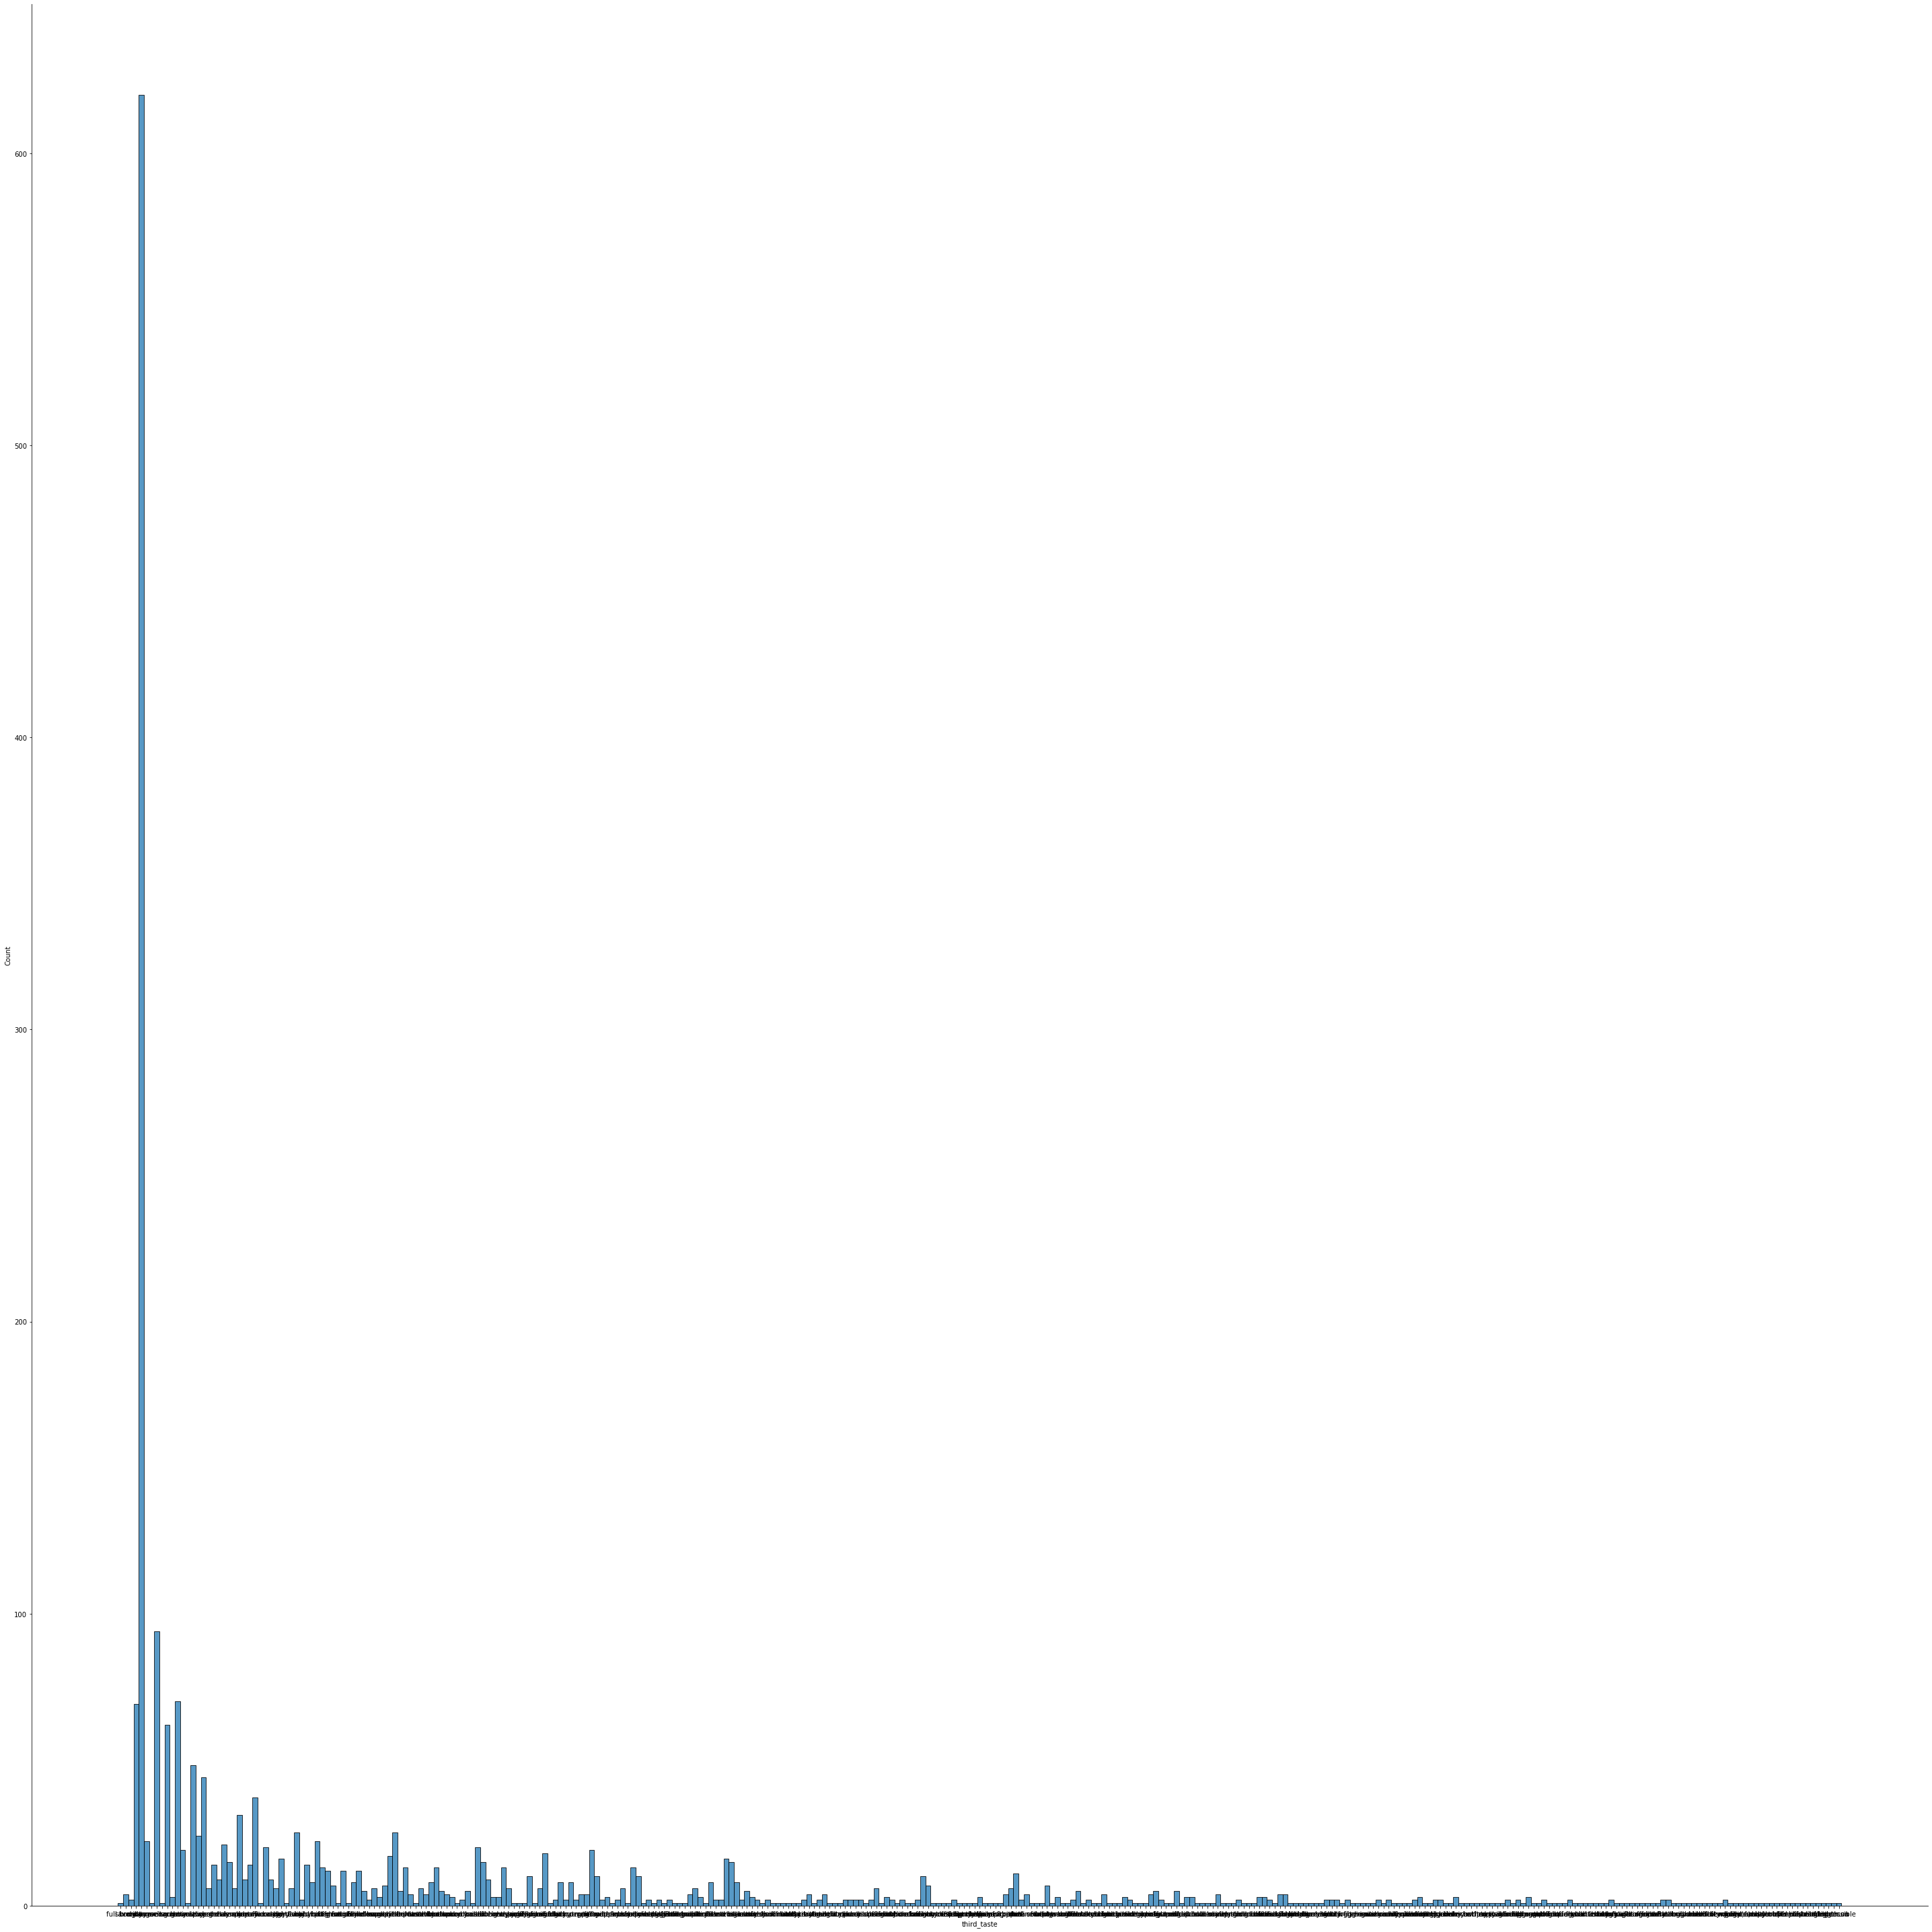

In [333]:
sns.displot(chocolate['third_taste'], height = 40)

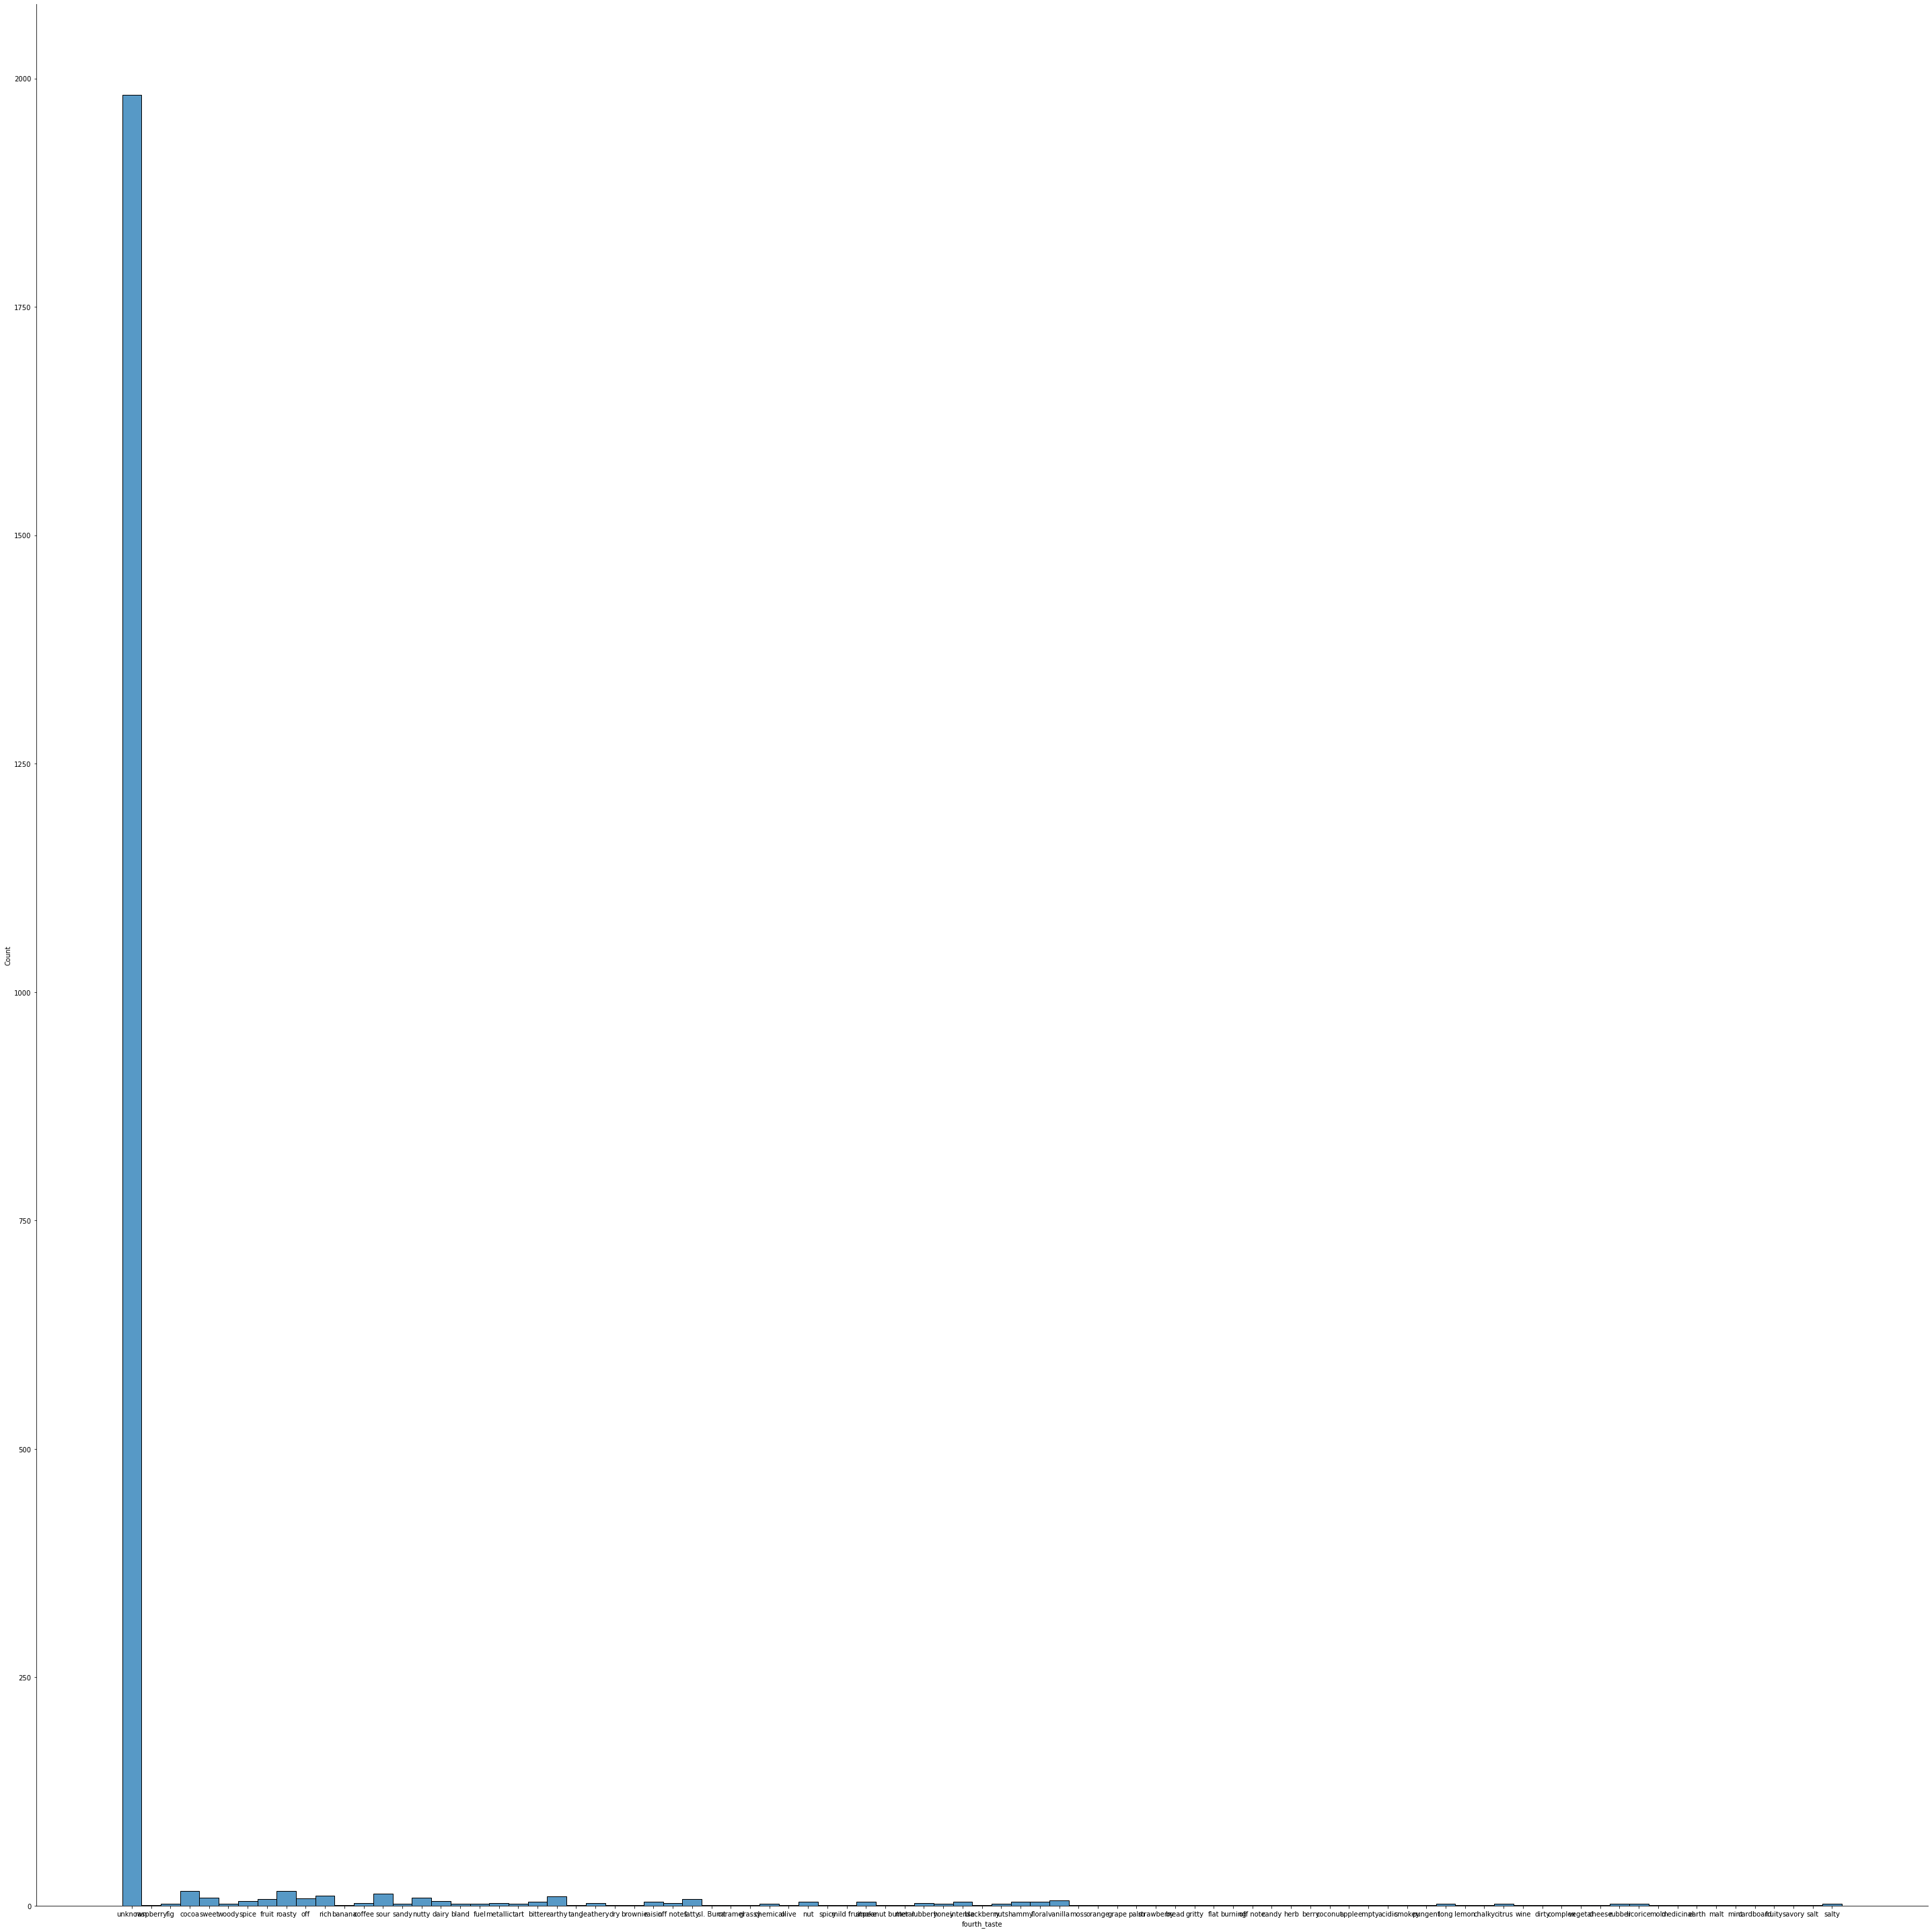

In [334]:
sns.displot(chocolate['fourth_taste'], height = 40)

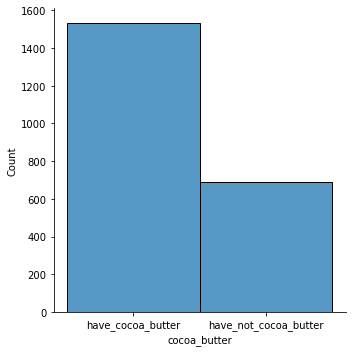

In [335]:
sns.displot(chocolate['cocoa_butter'])

## Convert categorical variables into numerical values

In [336]:
chocolate_company = chocolate.company.value_counts().to_dict()
chocolate_company_location = chocolate.company_location.value_counts().to_dict()
chocolate_country_of_bean_origin = chocolate.country_of_bean_origin.value_counts().to_dict()
chocolate_specific_bean_origin_or_bar_name = chocolate.specific_bean_origin_or_bar_name.value_counts().to_dict()
chocolate_vanilla = chocolate.vanilla.value_counts().to_dict()
chocolate_lecithin = chocolate.lecithin.value_counts().to_dict()
chocolate_salt = chocolate.salt.value_counts().to_dict()
chocolate_sugar = chocolate.sugar.value_counts().to_dict()
chocolate_sweetener_without_sugar = chocolate.sweetener_without_sugar.value_counts().to_dict()
chocolate_first_taste = chocolate.first_taste.value_counts().to_dict()
chocolate_second_taste = chocolate.second_taste.value_counts().to_dict()
chocolate_third_taste = chocolate.third_taste.value_counts().to_dict()
chocolate_fourth_taste = chocolate.fourth_taste.value_counts().to_dict()
chocolate_cocoa_butter = chocolate.cocoa_butter.value_counts().to_dict()

In [337]:
chocolate.company= chocolate.company.map(chocolate_company)
chocolate.company_location= chocolate.company_location.map(chocolate_company_location)
chocolate.country_of_bean_origin= chocolate.country_of_bean_origin.map(chocolate_country_of_bean_origin)
chocolate.specific_bean_origin_or_bar_name= chocolate.specific_bean_origin_or_bar_name.map(chocolate_specific_bean_origin_or_bar_name)
chocolate.vanilla= chocolate.vanilla.map(chocolate_vanilla)
chocolate.lecithin= chocolate.lecithin.map(chocolate_lecithin)
chocolate.salt= chocolate.salt.map(chocolate_salt)
chocolate.sugar= chocolate.sugar.map(chocolate_sugar)
chocolate.sweetener_without_sugar= chocolate.sweetener_without_sugar.map(chocolate_sweetener_without_sugar)
chocolate.first_taste= chocolate.first_taste.map(chocolate_first_taste)
chocolate.second_taste= chocolate.second_taste.map(chocolate_second_taste)
chocolate.third_taste= chocolate.third_taste.map(chocolate_third_taste)
chocolate.fourth_taste= chocolate.fourth_taste.map(chocolate_fourth_taste)
chocolate.cocoa_butter= chocolate.cocoa_butter.map(chocolate_cocoa_butter)

In [338]:
chocolate.head(120)

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,lecithin,vanilla,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,cocoa_butter
0,2454,3,948,2019,157,1,76.0,3.75,3,1745,1876,2187,2142,2148,29,5,1,1982,1535
1,2458,3,948,2019,200,1,76.0,3.50,3,1745,1876,2187,2142,2148,29,13,4,1982,1535
2,2454,3,948,2019,63,1,76.0,3.25,3,1745,1876,2187,2142,2148,23,49,2,1982,1535
3,797,25,167,2012,207,36,63.0,3.75,4,479,1876,2187,2142,2148,16,13,69,1982,1535
4,797,25,167,2012,71,8,70.0,3.50,4,479,1876,2187,2142,2148,6,83,620,1982,1535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1534,32,948,2015,74,2,70.0,3.50,2,1745,1876,2187,2142,2148,160,29,8,16,689
116,1534,32,948,2015,207,2,68.0,3.50,2,1745,1876,2187,2142,2148,46,83,13,1982,689
117,1598,32,948,2015,200,13,70.0,3.50,2,1745,1876,2187,2142,2148,47,14,70,1982,689
118,1602,32,948,2015,194,6,75.0,3.50,3,1745,1876,2187,2142,2148,81,58,5,1982,1535


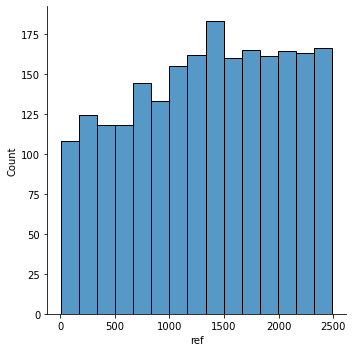

In [339]:
sns.displot(chocolate['ref'])

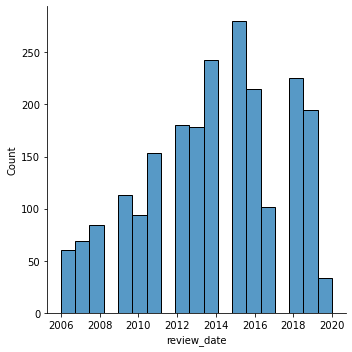

In [340]:
sns.displot(chocolate['review_date'])

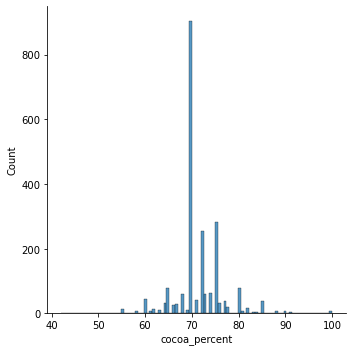

In [341]:
sns.displot(chocolate['cocoa_percent'])

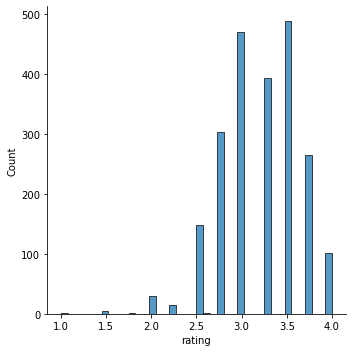

In [342]:
sns.displot(chocolate['rating'])

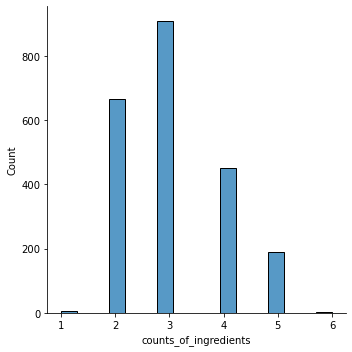

In [343]:
sns.displot(chocolate['counts_of_ingredients'])

## Correlation between the features

In [344]:
chocolate.corr()

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,lecithin,vanilla,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,cocoa_butter
ref,1.000000,-0.203165,0.042393,0.991602,-0.181028,-0.082630,0.054167,0.053467,-0.351235,0.250238,0.377067,0.060024,-0.029116,-0.032891,-0.137884,0.032616,0.007997,-0.029531,-0.171888
company,-0.203165,1.000000,-0.013712,-0.203868,0.041056,-0.119162,-0.022894,0.279048,0.035287,-0.004237,0.049867,-0.035846,0.016973,0.021773,0.074589,-0.042985,0.027635,0.002621,0.098079
company_location,0.042393,-0.013712,1.000000,0.052146,0.045531,0.042296,0.010999,-0.039008,-0.175200,0.209468,-0.039819,0.052411,0.003594,-0.007531,-0.045331,-0.022057,-0.019367,0.000743,-0.187230
review_date,0.991602,-0.203868,0.052146,1.000000,-0.175691,-0.073858,0.054985,0.054688,-0.361120,0.266303,0.391042,0.045882,-0.038410,-0.042017,-0.141397,0.033367,0.010996,-0.028376,-0.170211
country_of_bean_origin,-0.181028,0.041056,0.045531,-0.175691,1.000000,0.227420,0.025249,0.039567,0.001588,-0.009908,-0.018890,0.021134,-0.012298,-0.007699,0.098436,0.011728,0.009200,0.008294,-0.012623
specific_bean_origin_or_bar_name,-0.082630,-0.119162,0.042296,-0.073858,0.227420,1.000000,0.017274,-0.053241,-0.003374,0.015506,-0.045956,-0.027171,0.022166,0.024484,0.001190,0.017293,-0.032362,0.045027,-0.036034
cocoa_percent,0.054167,-0.022894,0.010999,0.054985,0.025249,0.017274,1.000000,-0.078508,-0.189490,0.151743,0.126034,0.028162,-0.085909,-0.008893,-0.039053,-0.117525,-0.051225,0.008483,-0.107737
rating,0.053467,0.279048,-0.039008,0.054688,0.039567,-0.053241,-0.078508,1.000000,-0.094850,0.070179,0.164881,0.051381,0.092216,0.087438,0.067909,-0.027879,0.074428,0.018563,0.012224
counts_of_ingredients,-0.351235,0.035287,-0.175200,-0.361120,0.001588,-0.003374,-0.189490,-0.094850,1.000000,-0.738399,-0.687676,-0.182218,0.041659,0.012713,0.071658,0.035556,-0.006995,-0.024379,0.751362
lecithin,0.250238,-0.004237,0.209468,0.266303,-0.009908,0.015506,0.151743,0.070179,-0.738399,1.000000,0.364437,-0.025389,-0.073489,-0.068447,-0.052292,-0.032399,0.013472,0.045398,-0.313168


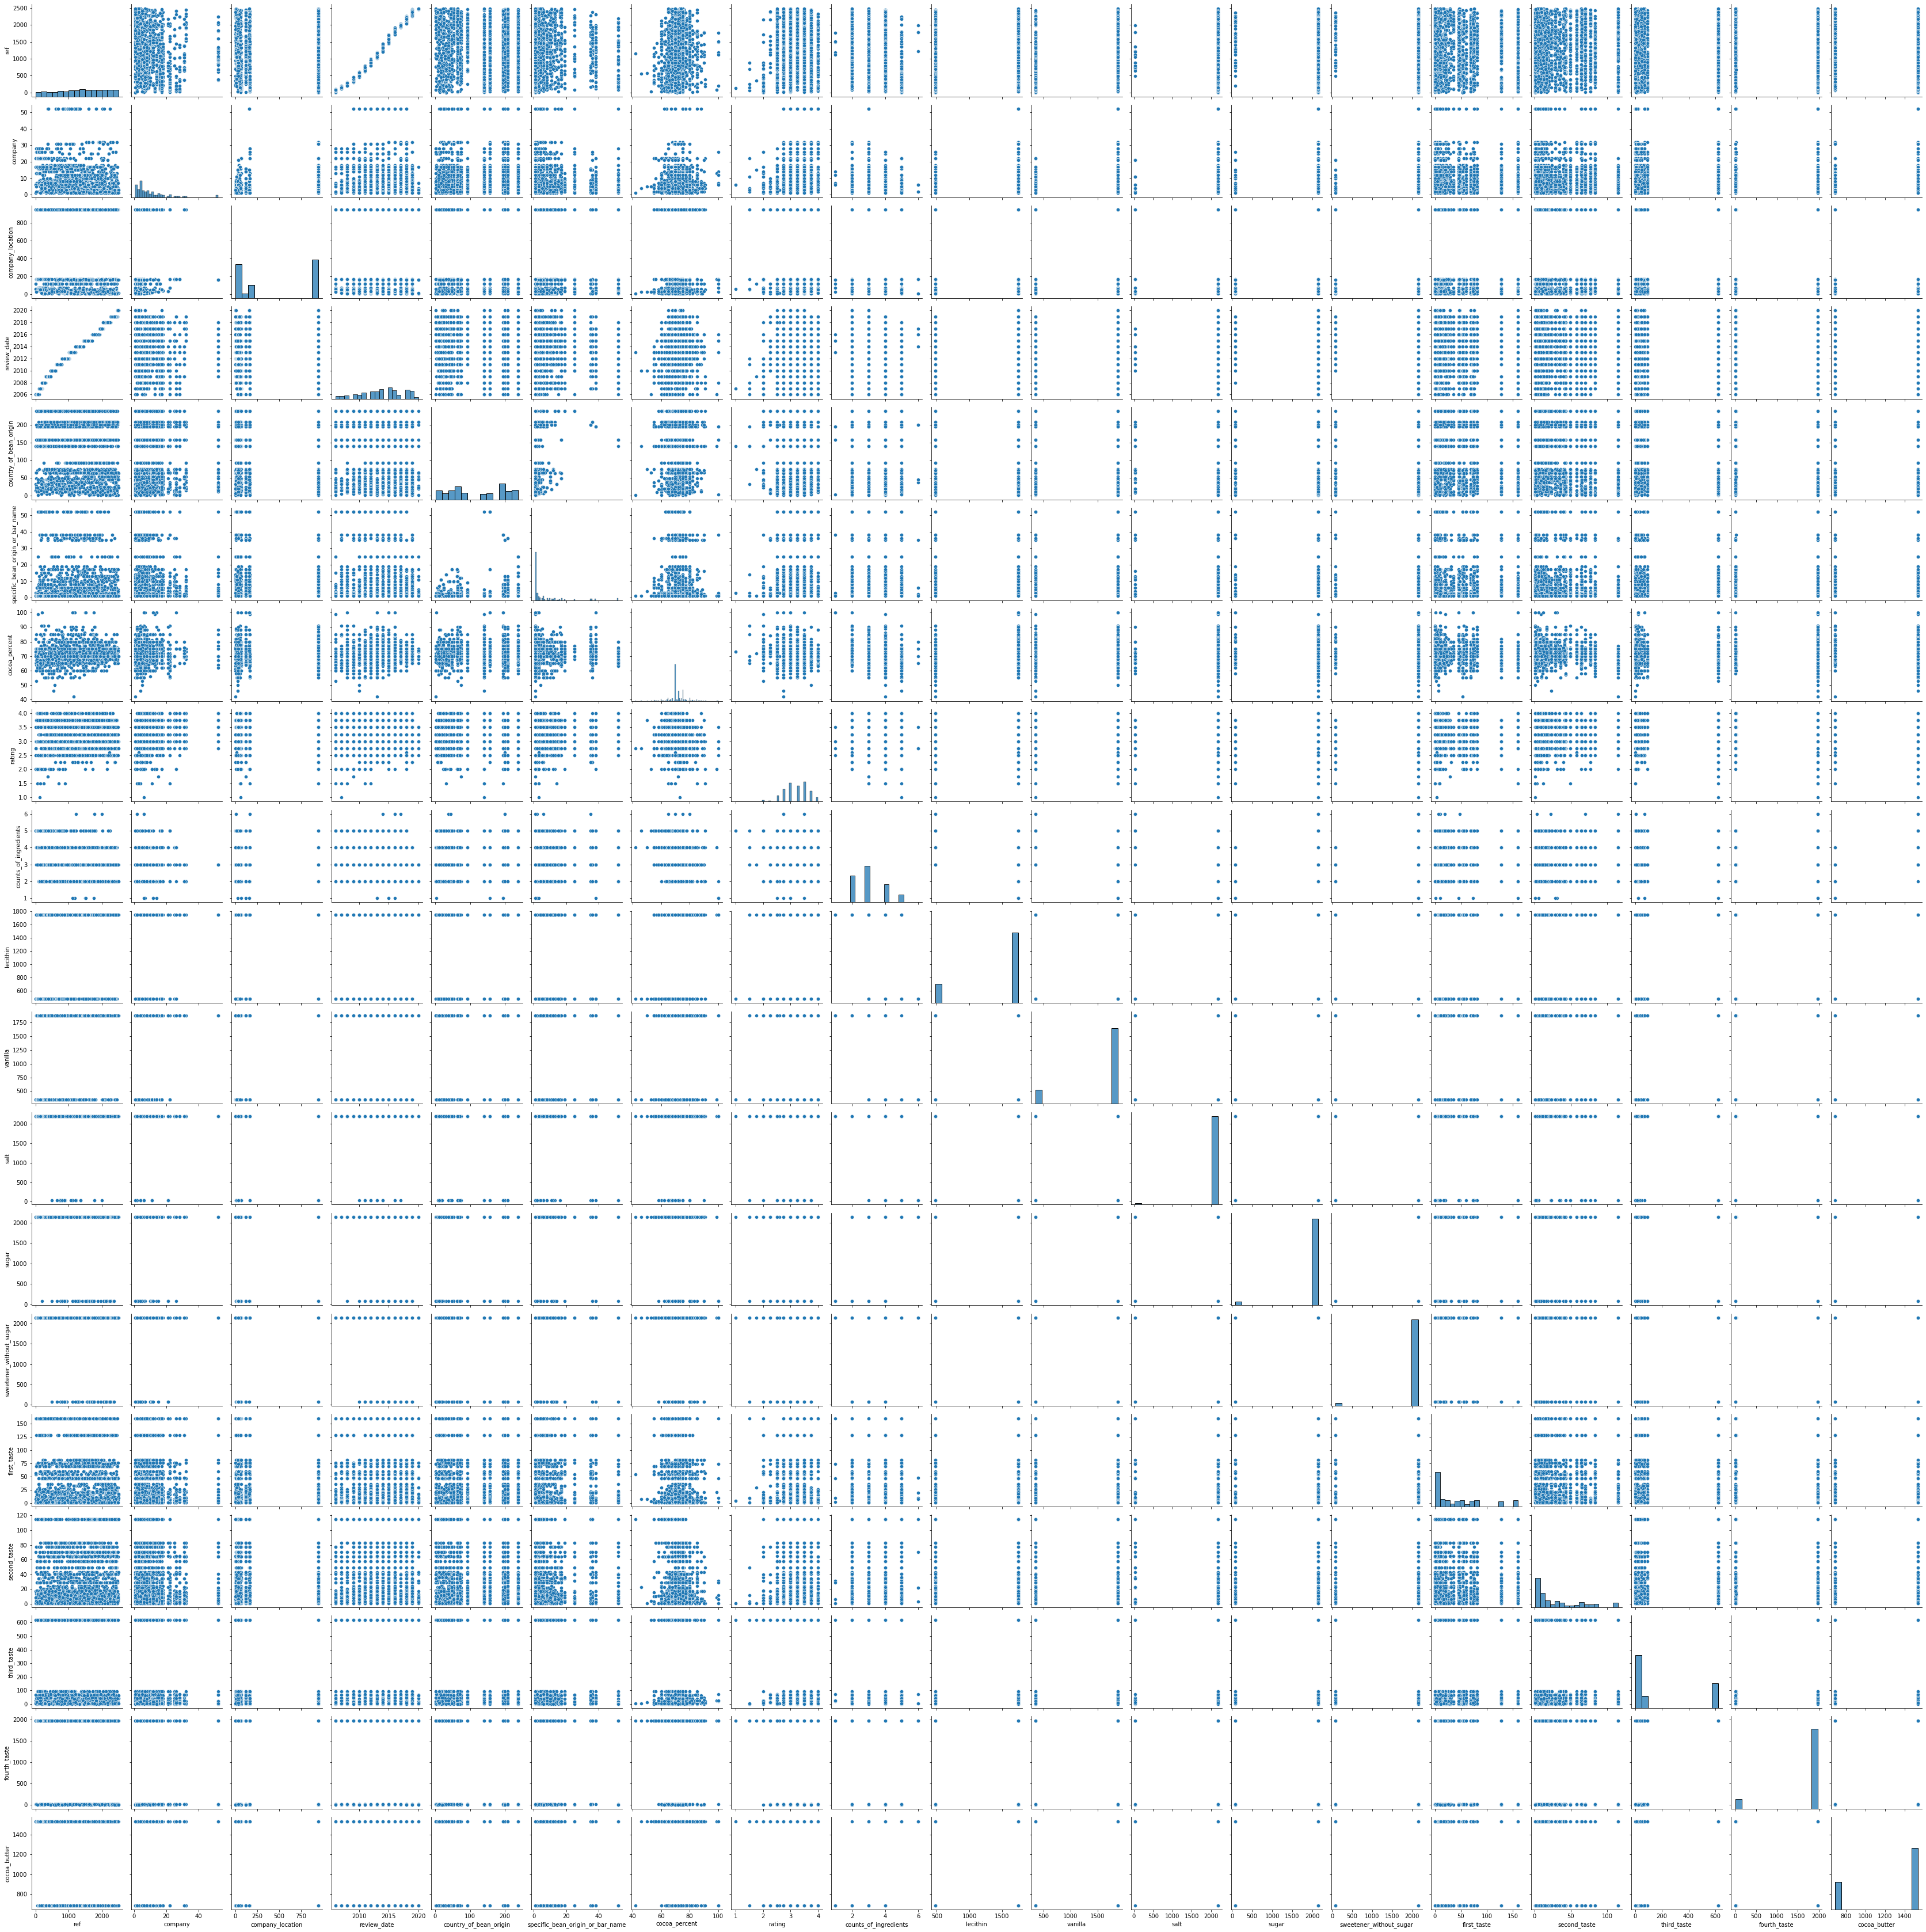

In [345]:
sns.pairplot(chocolate)

In [346]:
X = chocolate.iloc[:,:-1]
y = chocolate.iloc[:,-1]

## Managing the imbalanced dataset

In [347]:
#Get the cocoa butter and non-cocoa butter dataset
have_cocoa_butter = chocolate[chocolate['cocoa_butter']==1535]
have_not_cocoa_butter = chocolate[chocolate['cocoa_butter']==689]

In [348]:
print(have_cocoa_butter.shape, have_not_cocoa_butter.shape)

(1535, 19) (689, 19)


In [349]:
from imblearn.combine import SMOTETomek #Undersampling and Oversampling
smk = SMOTETomek(random_state=42)
X_res, y_res = smk.fit_resample(X, y)

In [351]:
X_res.shape, y_res.shape

((2930, 18), (2930,))

In [353]:
from collections import Counter
print('Original Dataset shape: {}'.format(Counter(y)))
print('Resampled Dataset shape: {}'.format(Counter(y_res)))

Original Dataset shape: Counter({1535: 1535, 689: 689})
Resampled Dataset shape: Counter({1535: 1465, 689: 1465})


In [354]:
from imblearn.over_sampling import RandomOverSampler

In [360]:
rs = RandomOverSampler(sampling_strategy=0.6) #ratio will tell the number of points needed to add to the smaller class to achieve the particular ratio of small class:big class

In [362]:
X_train_res, y_train_res = rs.fit_resample(X, y)

In [365]:
from collections import Counter
print('Original Dataset shape: {}'.format(Counter(y)))
print('Resampled Dataset shape: {}'.format(Counter(y_train_res)))

Original Dataset shape: Counter({1535: 1535, 689: 689})
Resampled Dataset shape: Counter({1535: 1535, 689: 921})


## Train-Test Split

In [366]:
#to create the train test split. Test size as 0.3 means 30% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(chocolate.drop('cocoa_butter', axis=1), chocolate['cocoa_butter'], test_size=0.30, random_state=101)

## Normalization of Data

In [367]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler().fit(X_train, y_train)
standardscaler

StandardScaler()

## Modelling and Prediction

In [368]:
#Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [369]:
#prediction of test data
y_pred = classifier.predict(X_test)

In [370]:
#check accuracy of predicted output values with actual output values
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.9925149700598802

In [371]:
accuracy

0.6781437125748503

In [372]:
from sklearn.metrics import accuracy_score

In [373]:
accuracy = accuracy_score(Y_test, predictions)
accuracy

0.6781437125748503

In [374]:
predictions

array([ 689,  689, 1535, 1535, 1535, 1535,  689, 1535, 1535,  689, 1535,
       1535, 1535,  689,  689, 1535,  689, 1535, 1535, 1535, 1535, 1535,
       1535,  689, 1535, 1535, 1535,  689,  689, 1535, 1535, 1535, 1535,
        689,  689, 1535, 1535,  689, 1535,  689, 1535, 1535, 1535,  689,
       1535,  689,  689, 1535,  689,  689,  689, 1535,  689, 1535, 1535,
       1535, 1535,  689, 1535, 1535, 1535, 1535,  689, 1535, 1535,  689,
        689, 1535, 1535, 1535, 1535, 1535, 1535, 1535,  689, 1535, 1535,
       1535, 1535, 1535, 1535, 1535,  689,  689, 1535, 1535,  689, 1535,
       1535,  689,  689, 1535, 1535, 1535, 1535, 1535, 1535, 1535, 1535,
        689, 1535, 1535, 1535, 1535, 1535, 1535, 1535, 1535,  689, 1535,
        689,  689, 1535,  689, 1535, 1535, 1535, 1535, 1535, 1535, 1535,
        689, 1535, 1535, 1535, 1535, 1535, 1535, 1535, 1535, 1535, 1535,
        689, 1535, 1535, 1535, 1535, 1535,  689, 1535, 1535, 1535, 1535,
       1535,  689, 1535, 1535,  689, 1535,  689, 15

## Evaluation

In [375]:
from sklearn.metrics import classification_report

In [376]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

         689       0.48      0.34      0.40       208
        1535       0.74      0.83      0.78       460

    accuracy                           0.68       668
   macro avg       0.61      0.59      0.59       668
weighted avg       0.66      0.68      0.66       668

